## 1. Importing Libraries
Before starting the analysis, we import the necessary libraries:
- **pandas**: for data manipulation and analysis.
- **matplotlib.pyplot**: for data visualization.
- **seaborn**: for statistical graphics.

These libraries are essential for handling and visualizing the dataset efficiently.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Loading the Dataset
We attempt to load the dataset using `pandas.read_csv()`. If the file is missing, an error message will be displayed to guide the user.

- The dataset is loaded into a pandas DataFrame (`df`).
- If successfully loaded, we check the number of rows and columns using `df.shape`.
- We preview the first few rows using `df.head()`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Install necessary libraries if not already installed
# !pip install pandas matplotlib seaborn

# Load the dataset
file_name = "/content/drive/Shareddrives/Seminario tarea 1/Evaluaciones_Agropecuarias_Municipales_EVA_20250215.csv"

try:
   df = pd.read_csv(file_name)
except FileNotFoundError:
    print("Error: The specific CVS file was not found. Please upload your dataset or provide the correct file path.")
    exit()

## 3. Checking Data Dimensions
To understand the dataset size, we use `df.shape`, which returns the number of rows and columns.

In [ ]:
print("Dimensiones del DataFrame:", df.shape)  # (filas, columnas)

Dimensiones del DataFrame: (206068, 17)


## 4. Previewing the Data
To get an initial understanding of the dataset, we use `df.head()` to display the first few rows.

In [ ]:
print("Primeras filas:")
df.head()

Primeras filas:


CÓD. \nDEP.        DEPARTAMENTO CÓD. MUN.   MUNICIPIO GRUPO \nDE CULTIVO  \
0           15              BOYACA    15,114    BUSBANZA         HORTALIZAS   
1           25        CUNDINAMARCA    25,754      SOACHA         HORTALIZAS   
2           25        CUNDINAMARCA    25,214        COTA         HORTALIZAS   
3           54  NORTE DE SANTANDER    54,405  LOS PATIOS         HORTALIZAS   
4           54  NORTE DE SANTANDER    54,518    PAMPLONA         HORTALIZAS   

  SUBGRUPO \nDE CULTIVO CULTIVO DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  \
0                ACELGA  ACELGA                                        ACELGA   
1                ACELGA  ACELGA                                        ACELGA   
2                ACELGA  ACELGA                                        ACELGA   
3                ACELGA  ACELGA                                        ACELGA   
4                ACELGA  ACELGA                                        ACELGA   

     AÑO PERIODO Área Sembrada\n(ha) Área Cosechada\n(ha) Producción\n(t)  \
0  2,006   2006B                   2                    1               1   
1  2,006   2006B                  82                   80           1,440   
2  2,006   2006B                   2                    2              26   
3  2,006   2006B                   3                    3              48   
4  2,006   2006B                   1                    1               5   

   Rendimiento\n(t/ha) ESTADO FISICO PRODUCCION NOMBRE \nCIENTIFICO  \
0                 1.00             FRUTO FRESCO       BETA VULGARIS   
1                18.00             FRUTO FRESCO       BETA VULGARIS   
2                17.33             FRUTO FRESCO       BETA VULGARIS   
3                16.00             FRUTO FRESCO       BETA VULGARIS   
4                10.00             FRUTO FRESCO       BETA VULGARIS   

  CICLO DE CULTIVO  
0      TRANSITORIO  
1      TRANSITORIO  
2      TRANSITORIO  
3      TRANSITORIO  
4      TRANSITORIO

## 5. Standardizing Column Names
Column names in raw datasets can be inconsistent. To improve readability and ease manipulation, we:
- Remove unnecessary newline (`\n`) characters.
- Convert column names to lowercase.
- Apply renaming for clarity (e.g., 'cód. dep.' → 'codigo_departamento').

In [ ]:
# Standardize column names: remove \n, extra spaces, and apply lower snake_case format
df.columns = (
    df.columns.str.replace("\n", "", regex=True)  # Remove newlines
    .str.lower()  # Convert to lowercase
)

# Custom renaming for better readability
df.rename(columns={
    "cód. dep.": "codigo_departamento",
    "departamento": "departamento",
    "cód. mun.": "codigo_municipio",
    "municipio": "municipio",
    "grupo de cultivo": "grupo_cultivo",
    "subgrupo de cultivo": "subgrupo_cultivo",
    "cultivo": "cultivo",
    "desagregación regional y/o sistema productivo": "desagregacion_regional",
    "año": "año",
    "periodo": "periodo",
    "área sembrada(ha)": "area_sembrada_ha",
    "área cosechada(ha)": "area_cosechada_ha",
    "producción(t)": "produccion_t",
    "rendimiento(t/ha)": "rendimiento_t_ha",
    "estado fisico produccion": "estado_fisico_produccion",
    "nombre cientifico": "nombre_cientifico",
    "ciclo de cultivo": "ciclo_cultivo"
}, inplace=True)



## 6. Remove **Unnecesary** Columns
In this step, we remove specific columns from our dataset that are not needed for our analysis. The df.drop() function is used to eliminate the columns "codigo_departamento", "codigo_municipio", and "nombre_cientifico", as they might not contribute relevant information to our analysis or visualization.
We then visualize with df.head() and df.info() to verify results

In [ ]:
# Drop columns related to "Codigos"
df = df.drop(columns=["codigo_departamento", "codigo_municipio", "nombre_cientifico"])


In [ ]:
# Display the result
df.head()

departamento   municipio grupo_cultivo subgrupo_cultivo cultivo  \
0              BOYACA    BUSBANZA    HORTALIZAS           ACELGA  ACELGA   
1        CUNDINAMARCA      SOACHA    HORTALIZAS           ACELGA  ACELGA   
2        CUNDINAMARCA        COTA    HORTALIZAS           ACELGA  ACELGA   
3  NORTE DE SANTANDER  LOS PATIOS    HORTALIZAS           ACELGA  ACELGA   
4  NORTE DE SANTANDER    PAMPLONA    HORTALIZAS           ACELGA  ACELGA   

  desagregacion_regional    año periodo area_sembrada_ha area_cosechada_ha  \
0                 ACELGA  2,006   2006B                2                 1   
1                 ACELGA  2,006   2006B               82                80   
2                 ACELGA  2,006   2006B                2                 2   
3                 ACELGA  2,006   2006B                3                 3   
4                 ACELGA  2,006   2006B                1                 1   

  produccion_t  rendimiento_t_ha estado_fisico_produccion ciclo_cultivo  
0            1              1.00             FRUTO FRESCO   TRANSITORIO  
1        1,440             18.00             FRUTO FRESCO   TRANSITORIO  
2           26             17.33             FRUTO FRESCO   TRANSITORIO  
3           48             16.00             FRUTO FRESCO   TRANSITORIO  
4            5             10.00             FRUTO FRESCO   TRANSITORIO

In [ ]:
print("General Information:")
print(df.info())
print(df.isnull().sum())

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   departamento              206068 non-null  object 
 1   municipio                 206067 non-null  object 
 2   grupo_cultivo             206068 non-null  object 
 3   subgrupo_cultivo          206068 non-null  object 
 4   cultivo                   206068 non-null  object 
 5   desagregacion_regional    206068 non-null  object 
 6   año                       206068 non-null  object 
 7   periodo                   206068 non-null  object 
 8   area_sembrada_ha          206068 non-null  object 
 9   area_cosechada_ha         206068 non-null  object 
 10  produccion_t              206068 non-null  object 
 11  rendimiento_t_ha          202635 non-null  float64
 12  estado_fisico_produccion  206068 non-null  object 
 13  ciclo_cultivo          

## 7. Get Numeric Columns And Format Them For Use
In this step, we ensure that specific columns containing numerical data are correctly formatted for analysis.

Selecting Columns for Conversion
We define a list of numerical columns (numeric_columns) that need to be converted to a numerical format. These columns, such as "area_sembrada_ha", "area_cosechada_ha", "produccion_t", and "rendimiento_t_ha", may currently be stored as text due to the presence of formatting characters like commas.

Removing Commas and Converting to Float
We use the .replace() method with a regular expression to remove commas (",") from these columns, ensuring that the numbers are properly formatted. Then, we apply .astype("float64") to convert them into a numeric data type.

Verifying the Conversion
Finally, we use df.dtypes to display the data types of all columns, confirming that the specified numeric columns have been successfully converted to float64, making them ready for further calculations or visualizations.



In [ ]:
# List of numerical columns to convert
numeric_columns = ["area_sembrada_ha", "area_cosechada_ha", "produccion_t"]

# Remove commas and convert to float
df[numeric_columns] = df[numeric_columns].replace({",": ""}, regex=True).astype("float64")

# Verify conversion
print(df.dtypes)


departamento                 object
municipio                    object
grupo_cultivo                object
subgrupo_cultivo             object
cultivo                      object
desagregacion_regional       object
año                          object
periodo                      object
area_sembrada_ha            float64
area_cosechada_ha           float64
produccion_t                float64
rendimiento_t_ha            float64
estado_fisico_produccion     object
ciclo_cultivo                object
dtype: object


In [ ]:
# Display the result
df.head()

departamento   municipio grupo_cultivo subgrupo_cultivo cultivo  \
0              BOYACA    BUSBANZA    HORTALIZAS           ACELGA  ACELGA   
1        CUNDINAMARCA      SOACHA    HORTALIZAS           ACELGA  ACELGA   
2        CUNDINAMARCA        COTA    HORTALIZAS           ACELGA  ACELGA   
3  NORTE DE SANTANDER  LOS PATIOS    HORTALIZAS           ACELGA  ACELGA   
4  NORTE DE SANTANDER    PAMPLONA    HORTALIZAS           ACELGA  ACELGA   

  desagregacion_regional    año periodo  area_sembrada_ha  area_cosechada_ha  \
0                 ACELGA  2,006   2006B               2.0                1.0   
1                 ACELGA  2,006   2006B              82.0               80.0   
2                 ACELGA  2,006   2006B               2.0                2.0   
3                 ACELGA  2,006   2006B               3.0                3.0   
4                 ACELGA  2,006   2006B               1.0                1.0   

   produccion_t  rendimiento_t_ha estado_fisico_produccion ciclo_cultivo  
0           1.0              1.00             FRUTO FRESCO   TRANSITORIO  
1        1440.0             18.00             FRUTO FRESCO   TRANSITORIO  
2          26.0             17.33             FRUTO FRESCO   TRANSITORIO  
3          48.0             16.00             FRUTO FRESCO   TRANSITORIO  
4           5.0             10.00             FRUTO FRESCO   TRANSITORIO

## 8. Visualize Again and Prepare to Handle Null Values and Zero Values
Before handling missing values, we analyze the dataset again to understand its structure and identify potential issues.

Descriptive Statistics
We use df.describe(include='all') to generate summary statistics for both numerical and categorical columns. This provides insights into:

The number of unique values in categorical columns.
The most frequent values (top) and their occurrence count (freq).
The distribution of numerical values, including minimum, maximum, and quartiles.
Checking Data Types and Missing Values
The df.info() function is used to display the structure of the dataset, including:

The number of non-null values per column.
The data type of each column.

We then use print(df.isnull().sum()) to get which columns contain null values



In [ ]:
print("Descriptive Stats:")
df[numeric_columns].describe(include='all')

Descriptive Stats:


area_sembrada_ha  area_cosechada_ha  produccion_t
count     206068.000000      206068.000000  2.060680e+05
mean         291.073825         249.419522  2.790726e+03
std         1153.602556         980.375226  4.511471e+04
min            0.000000           0.000000  0.000000e+00
25%           10.000000           8.000000  3.200000e+01
50%           35.000000          30.000000  1.400000e+02
75%          151.000000         130.000000  6.480000e+02
max        47403.000000       38600.000000  4.546116e+06

In [ ]:
print("General Information:")
print(df.info())

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   departamento              206068 non-null  object 
 1   municipio                 206067 non-null  object 
 2   grupo_cultivo             206068 non-null  object 
 3   subgrupo_cultivo          206068 non-null  object 
 4   cultivo                   206068 non-null  object 
 5   desagregacion_regional    206068 non-null  object 
 6   año                       206068 non-null  object 
 7   periodo                   206068 non-null  object 
 8   area_sembrada_ha          206068 non-null  float64
 9   area_cosechada_ha         206068 non-null  float64
 10  produccion_t              206068 non-null  float64
 11  rendimiento_t_ha          202635 non-null  float64
 12  estado_fisico_produccion  206068 non-null  object 
 13  ciclo_cultivo          

In [ ]:
print(df.isnull().sum())

departamento                   0
municipio                      1
grupo_cultivo                  0
subgrupo_cultivo               0
cultivo                        0
desagregacion_regional         0
año                            0
periodo                        0
area_sembrada_ha               0
area_cosechada_ha              0
produccion_t                   0
rendimiento_t_ha            3433
estado_fisico_produccion       0
ciclo_cultivo                  0
dtype: int64


## 9. Removing Missing Rows

As we only have 1 row containing a Null value for municipio, it is insignificant enough so we can remove it.
We use print(df.isnull().sum()) again to verify results and look at the remianing columns with Null values

In [ ]:
# prompt: Eliminarte the null value of rendimiento column

# Drop rows with null values in the 'rendimiento_t_ha' column
df = df.dropna(subset=['rendimiento_t_ha'])

# Verify the changes
print(df.isnull().sum())


departamento                0
municipio                   1
grupo_cultivo               0
subgrupo_cultivo            0
cultivo                     0
desagregacion_regional      0
año                         0
periodo                     0
area_sembrada_ha            0
area_cosechada_ha           0
produccion_t                0
rendimiento_t_ha            0
estado_fisico_produccion    0
ciclo_cultivo               0
dtype: int64


In [ ]:
df = df.dropna(subset=["municipio"])

# Verify if there are still missing values
print(df.isnull().sum())

departamento                0
municipio                   0
grupo_cultivo               0
subgrupo_cultivo            0
cultivo                     0
desagregacion_regional      0
año                         0
periodo                     0
area_sembrada_ha            0
area_cosechada_ha           0
produccion_t                0
rendimiento_t_ha            0
estado_fisico_produccion    0
ciclo_cultivo               0
dtype: int64


In [ ]:
# Check for rows where 'area_cosechada_ha' is 0
zero_area_rows = df[df['area_cosechada_ha'] == 0]
print (zero_area_rows)

# Decide how to handle these rows:
# Option 1: Remove them
#df = df[df['area_cosechada_ha'] != 0]

#Option 2: Replace 'area_cosechada_ha' with a small value (e.g., 0.001)
df.loc[df['area_cosechada_ha'] == 0, 'area_cosechada_ha'] = 0.001

        departamento municipio grupo_cultivo subgrupo_cultivo    cultivo  \
29      CUNDINAMARCA   NOCAIMA    HORTALIZAS           ACELGA     ACELGA   
36      CUNDINAMARCA   NOCAIMA    HORTALIZAS           ACELGA     ACELGA   
47            BOYACA     NOBSA    HORTALIZAS           ACELGA     ACELGA   
61            BOYACA    OICATA    HORTALIZAS           ACELGA     ACELGA   
107           BOYACA     NOBSA    HORTALIZAS           ACELGA     ACELGA   
...              ...       ...           ...              ...        ...   
204913        CALDAS   MARMATO    HORTALIZAS        ZANAHORIA  ZANAHORIA   
204981        CALDAS   MARMATO    HORTALIZAS        ZANAHORIA  ZANAHORIA   
205053        CALDAS   MARMATO    HORTALIZAS        ZANAHORIA  ZANAHORIA   
205124        CALDAS   MARMATO    HORTALIZAS        ZANAHORIA  ZANAHORIA   
205197        CALDAS   MARMATO    HORTALIZAS        ZANAHORIA  ZANAHORIA   

       desagregacion_regional    año periodo  area_sembrada_ha  \
29                   

In [ ]:
# Create a new calculated rendimiento column
df["calculated_rendimiento_t_ha"] = df["produccion_t"] / df["area_cosechada_ha"]

print(df['calculated_rendimiento_t_ha'].describe())

# Verify if there are still missing values
print(df.isnull().sum())

count    202634.000000
mean         33.033678
std         744.204093
min           0.000000
25%           1.509091
50%           5.000000
75%          11.222143
max       68000.000000
Name: calculated_rendimiento_t_ha, dtype: float64
departamento                   0
municipio                      0
grupo_cultivo                  0
subgrupo_cultivo               0
cultivo                        0
desagregacion_regional         0
año                            0
periodo                        0
area_sembrada_ha               0
area_cosechada_ha              0
produccion_t                   0
rendimiento_t_ha               0
estado_fisico_produccion       0
ciclo_cultivo                  0
calculated_rendimiento_t_ha    0
dtype: int64


In [ ]:
# Drop rows with NaN values in the 'calculated_rendimiento_t_ha' column
df = df.dropna(subset=['calculated_rendimiento_t_ha'])

# Verify if there are still missing values in the specified column
print("General Information:")
print(df.info())

# Display the result
df.head()

General Information:
<class 'pandas.core.frame.DataFrame'>
Index: 202634 entries, 0 to 206067
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   departamento                 202634 non-null  object 
 1   municipio                    202634 non-null  object 
 2   grupo_cultivo                202634 non-null  object 
 3   subgrupo_cultivo             202634 non-null  object 
 4   cultivo                      202634 non-null  object 
 5   desagregacion_regional       202634 non-null  object 
 6   año                          202634 non-null  object 
 7   periodo                      202634 non-null  object 
 8   area_sembrada_ha             202634 non-null  float64
 9   area_cosechada_ha            202634 non-null  float64
 10  produccion_t                 202634 non-null  float64
 11  rendimiento_t_ha             202634 non-null  float64
 12  estado_fisico_produccion     202634 non-nu

departamento   municipio grupo_cultivo subgrupo_cultivo cultivo  \
0              BOYACA    BUSBANZA    HORTALIZAS           ACELGA  ACELGA   
1        CUNDINAMARCA      SOACHA    HORTALIZAS           ACELGA  ACELGA   
2        CUNDINAMARCA        COTA    HORTALIZAS           ACELGA  ACELGA   
3  NORTE DE SANTANDER  LOS PATIOS    HORTALIZAS           ACELGA  ACELGA   
4  NORTE DE SANTANDER    PAMPLONA    HORTALIZAS           ACELGA  ACELGA   

  desagregacion_regional    año periodo  area_sembrada_ha  area_cosechada_ha  \
0                 ACELGA  2,006   2006B               2.0                1.0   
1                 ACELGA  2,006   2006B              82.0               80.0   
2                 ACELGA  2,006   2006B               2.0                2.0   
3                 ACELGA  2,006   2006B               3.0                3.0   
4                 ACELGA  2,006   2006B               1.0                1.0   

   produccion_t  rendimiento_t_ha estado_fisico_produccion ciclo_cultivo  \
0           1.0              1.00             FRUTO FRESCO   TRANSITORIO   
1        1440.0             18.00             FRUTO FRESCO   TRANSITORIO   
2          26.0             17.33             FRUTO FRESCO   TRANSITORIO   
3          48.0             16.00             FRUTO FRESCO   TRANSITORIO   
4           5.0             10.00             FRUTO FRESCO   TRANSITORIO   

   calculated_rendimiento_t_ha  
0                          1.0  
1                         18.0  
2                         13.0  
3                         16.0  
4                          5.0

## XX. Descriptive Statistics and Data Visualization
We analyze the relationship between harvested area (area_cosechada_ha) and production (produccion_t) using a scatter plot, followed by a summary of yield (rendimiento_t_ha).

1. Scatter Plot: Production vs. Harvested Area
We visualize the relationship between harvested area (area_cosechada_ha) on the x-axis and production (produccion_t) on the y-axis.
The scatter plot helps identify patterns, such as whether production increases proportionally with the harvested area.
The transparency level (alpha=0.6) improves readability when points overlap.
2. Descriptive Statistics for Yield (rendimiento_t_ha)
The df.describe() function provides key statistics:
Mean (9.24): The average yield per hectare.
Standard deviation (14.89): Indicates variability in yield.
Min (0) and Max (248): Show the range of values.
Quartiles (25%, 50%, 75%): Help understand the distribution of yield values.
This analysis helps assess the dataset's consistency and detect possible outliers or irregularities.



In [ ]:
df.head()

Empty DataFrame
Columns: [departamento, municipio, grupo_cultivo, subgrupo_cultivo, cultivo, desagregacion_regional, año, periodo, area_sembrada_ha, area_cosechada_ha, produccion_t, rendimiento_t_ha, estado_fisico_produccion, ciclo_cultivo, calculated_rendimiento_t_ha]
Index: []

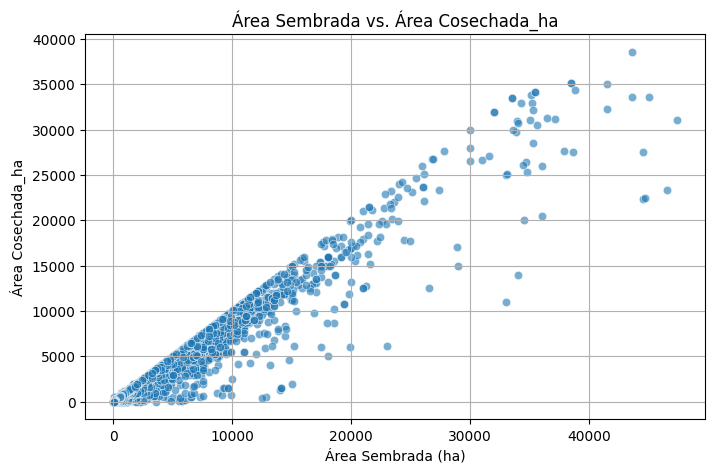

In [ ]:
# Reload the dataset (assuming df_selected is already cleaned)
# Scatterplot: Producción (t) vs. Área Cosechada (ha)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["area_sembrada_ha"], y=df["area_cosechada_ha"], alpha=0.6)
plt.xlabel("Área Sembrada (ha)")
plt.ylabel("Área Cosechada_ha")
plt.title("Área Sembrada vs. Área Cosechada_ha")
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
df.describe()  # Información general del DataFrame (columnas, tipos de datos, valores nulos)

area_sembrada_ha  area_cosechada_ha  produccion_t  rendimiento_t_ha  \
count     202634.000000      202634.000000  2.026340e+05     202634.000000   
mean         294.535127         253.645503  2.838005e+03          9.238786   
std         1161.512866         988.105258  4.549391e+04         14.888688   
min            0.000000           0.001000  0.000000e+00          0.030000   
25%           10.000000           8.000000  3.500000e+01          1.500000   
50%           36.000000          30.000000  1.500000e+02          5.000000   
75%          155.000000         132.000000  6.700000e+02         11.230000   
max        47403.000000       38600.000000  4.546116e+06        246.000000   

       calculated_rendimiento_t_ha  
count                202634.000000  
mean                     33.033678  
std                     744.204093  
min                       0.000000  
25%                       1.509091  
50%                       5.000000  
75%                      11.222143  
max                   68000.000000

## XX. Adding more visualizations (Box Plot)




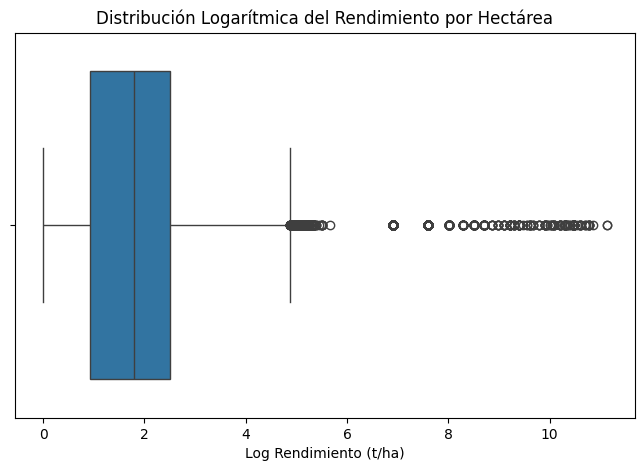

In [ ]:
# Opcion 2: Esta celda transforma la data con una funcion logaritmica para reducir el efecto de los outliers, utilizaremos esta, si es el metodo q escogemos



# Apply log transformation
df["log_rendimiento"] = np.log1p(df["calculated_rendimiento_t_ha"])  # log1p avoids log(0) issues

# Create a new boxplot for log-transformed data
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["log_rendimiento"])
plt.xlabel("Log Rendimiento (t/ha)")
plt.title("Distribución Logarítmica del Rendimiento por Hectárea")
plt.show()

## XX. Adding more visualizations (Heatmap)




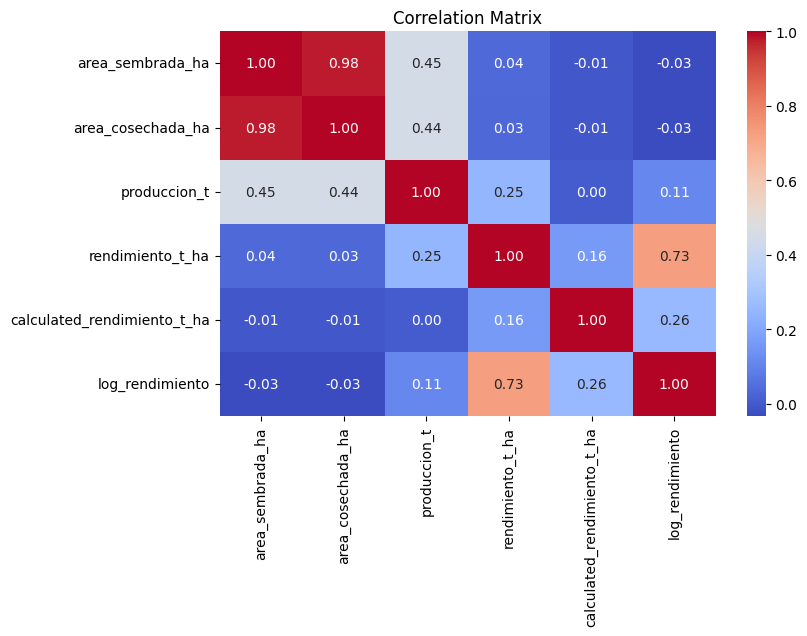

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set English labels
plt.title("Correlation Matrix")
plt.show()



1️⃣ Strong Positive Correlations
area_sembrada_ha ↔ area_cosechada_ha (0.98)
Very high correlation → Expected, since the area harvested is usually proportional to the area planted.
rendimiento_t_ha ↔ log_rendimiento (0.76)
High correlation → This confirms that log transformation retains the general trends of yield but helps reduce the impact of extreme values.

2️⃣ Moderate Correlations
area_cosechada_ha ↔ produccion_t (0.44)

Makes sense → The more land you harvest, the higher the production, but it's not a perfect 1.0 correlation because other factors affect productivity.
rendimiento_t_ha ↔ produccion_t (0.25)

This is weaker than expected → Yield (tons per hectare) does not strongly predict total production because total production also depends on how much land is used.

3️⃣ Weak or No Correlation
log_rendimiento ↔ area_cosechada_ha (-0.03)
No real correlation → This suggests that increasing harvested area does not necessarily improve yield.

## XX. Adding more visualizations (Yield per crop)


**** LA SIGUIENTE VISUZLIZACION USA HEATMAPS PARA VISUALIZAR LA RELACION DE LA CELDA ANTERIOR, PERO DIVIDIDA HACIA CADA TIPO DE COSECHA***



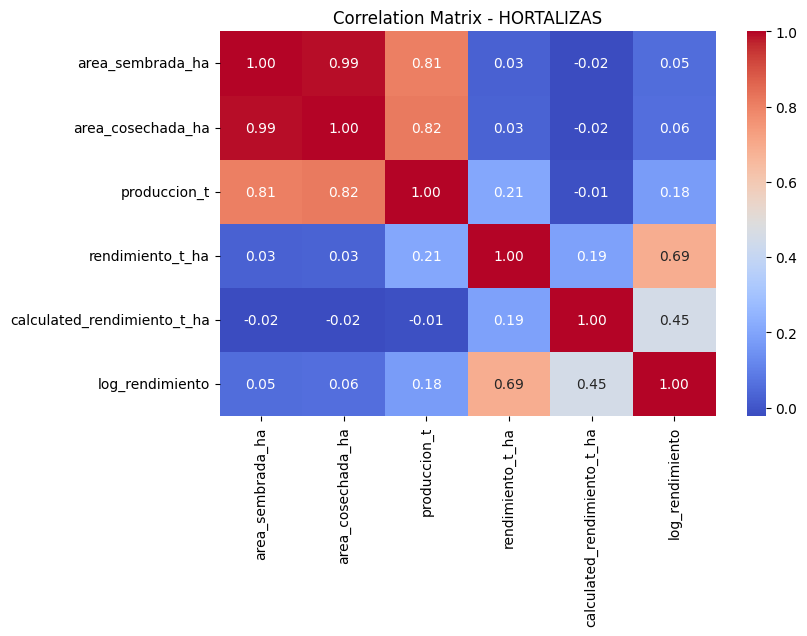

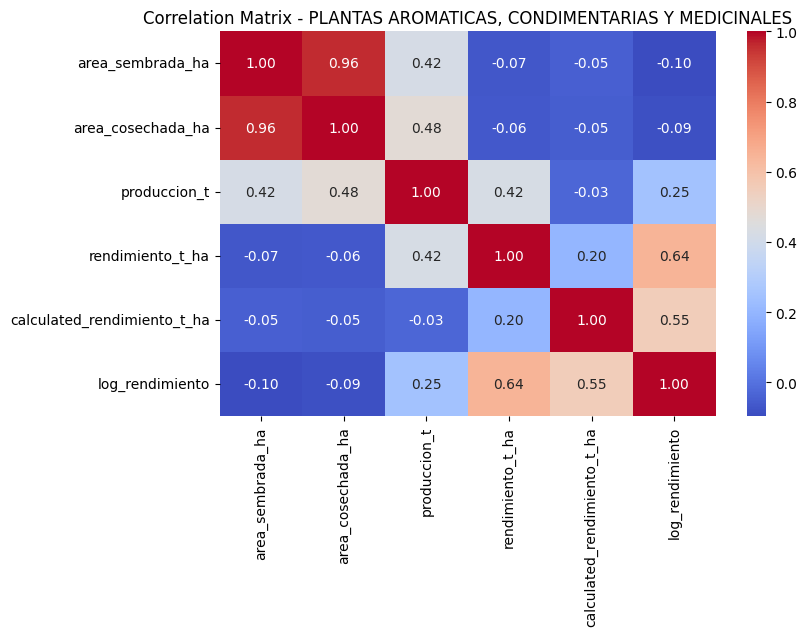

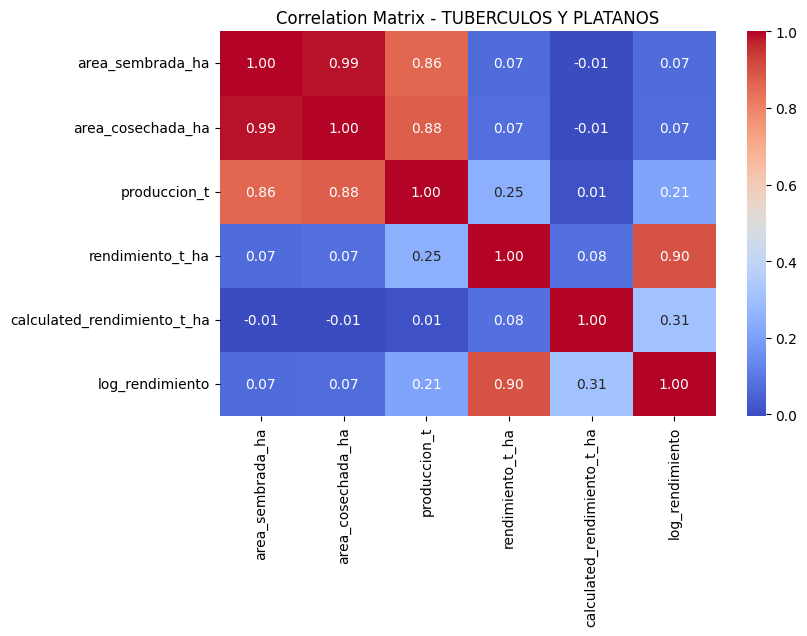

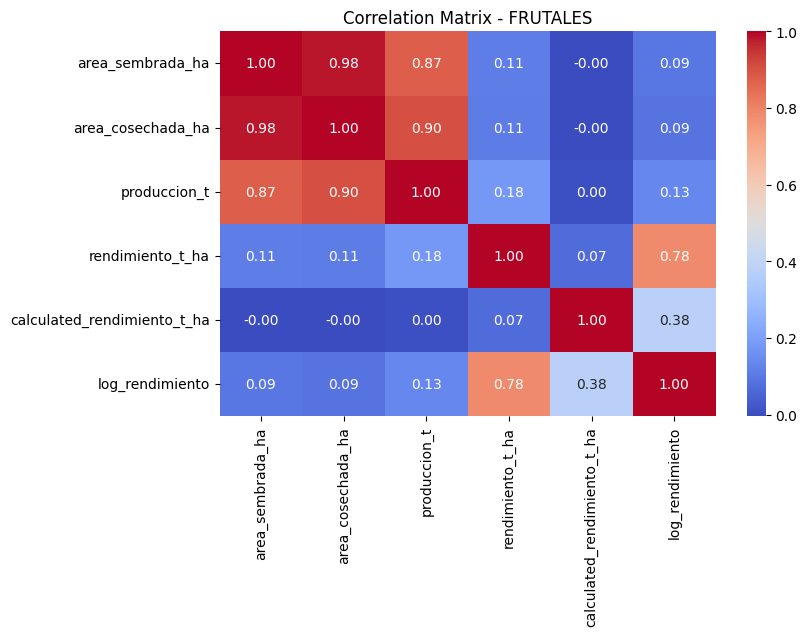

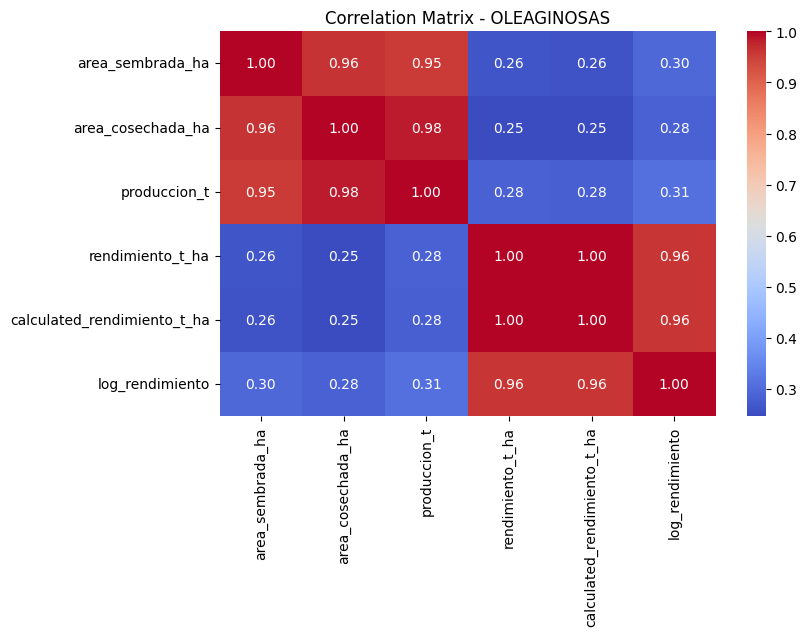

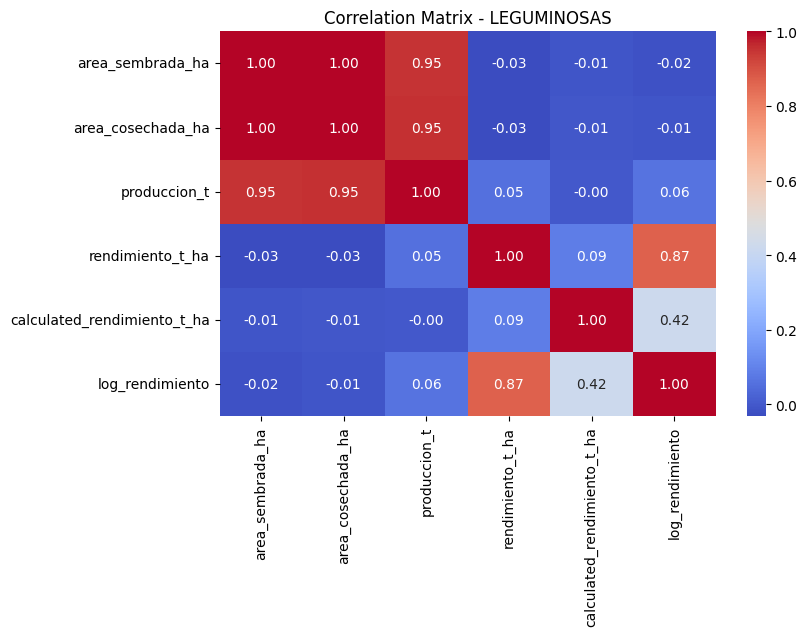

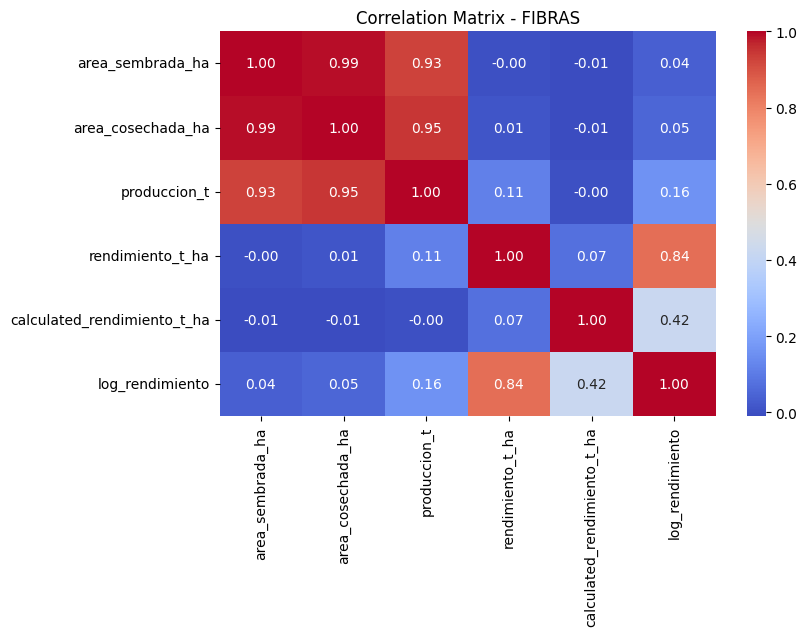

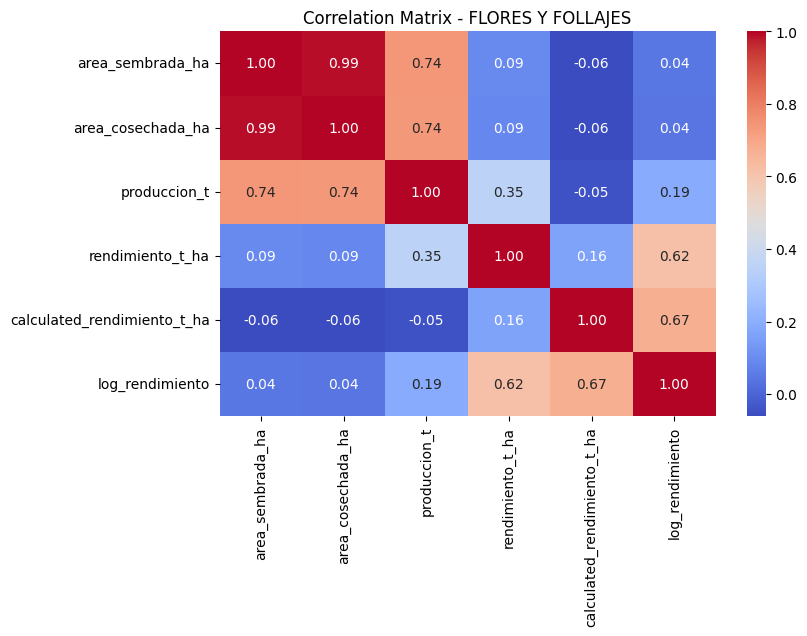

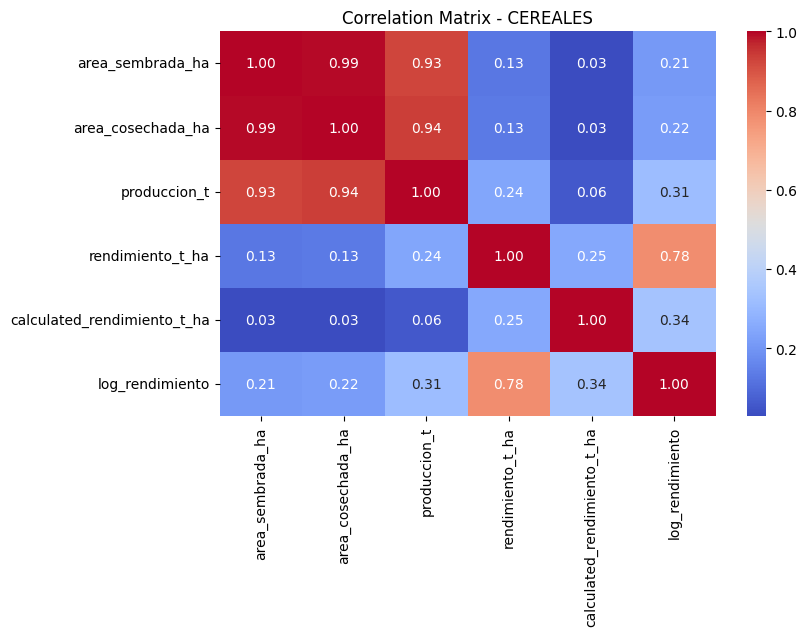

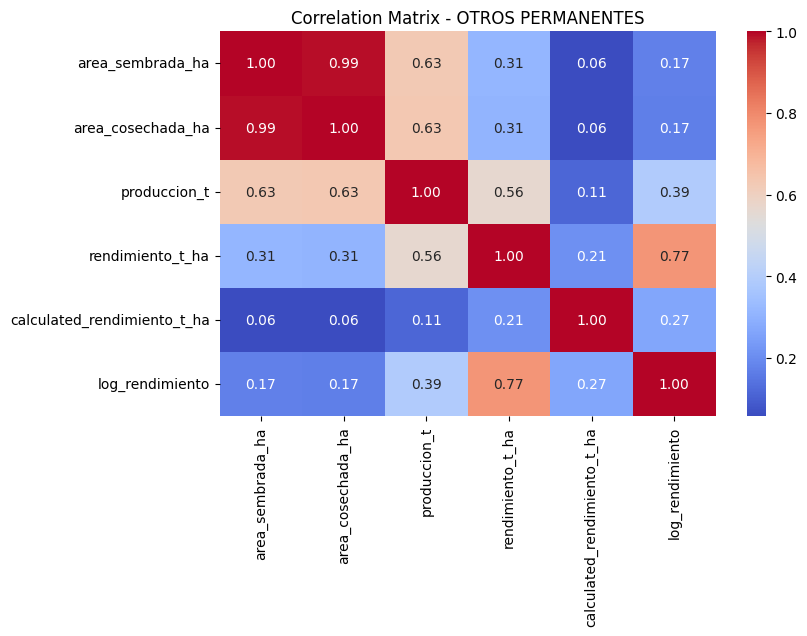

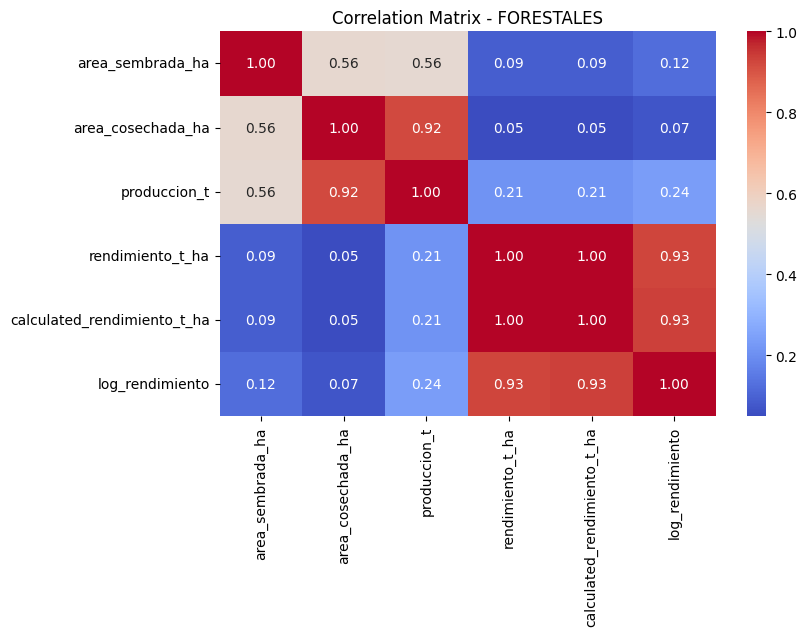

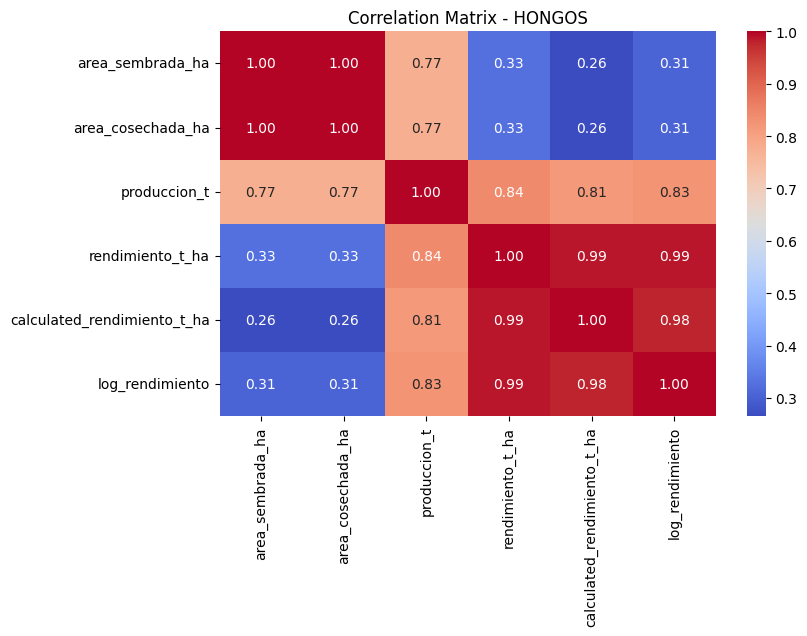

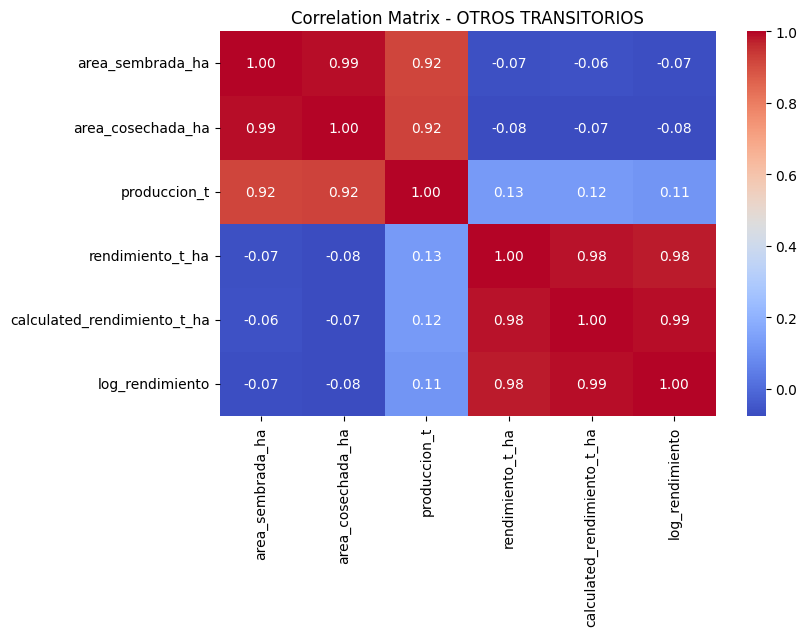

In [ ]:
# Get unique crop groups
crop_groups = df["grupo_cultivo"].unique()

# Loop through each crop group and create a heatmap
for crop in crop_groups:
    plt.figure(figsize=(8, 5))

    # Compute correlation for this crop group
    crop_corr = df[df["grupo_cultivo"] == crop].select_dtypes(include=["float64", "int64"]).corr()

    # Only show heatmap if there are at least 2 numerical columns
    if crop_corr.shape[0] > 1:
        sns.heatmap(crop_corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Matrix - {crop}")
        plt.show()

## XX. Adding more visualizations (Yield per DEPARTMENT)


**** LA SIGUIENTE VISUZLIZACION USA HEATMAPS PARA VISUALIZAR LA RELACION DE LA CELDA ANTERIOR, PERO DIVIDIDA HACIA CADA DEPARTAMENTO***



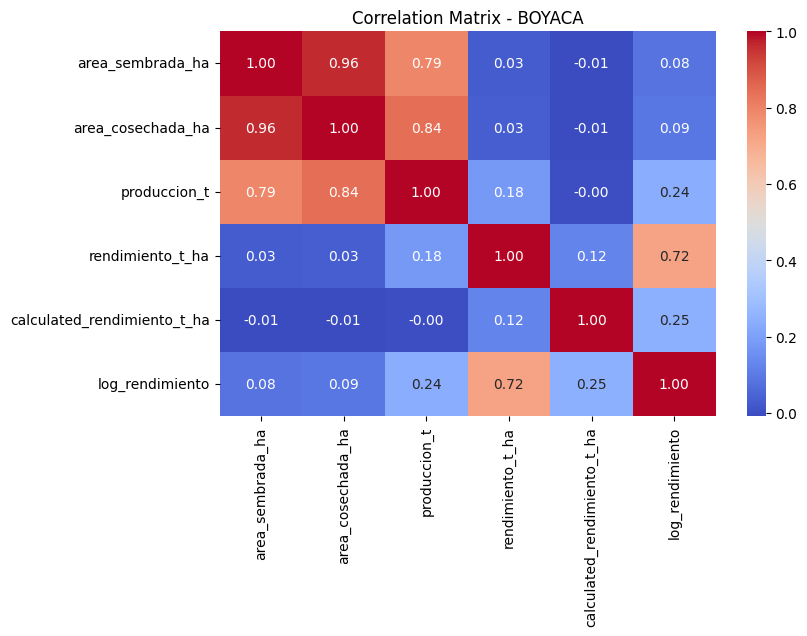

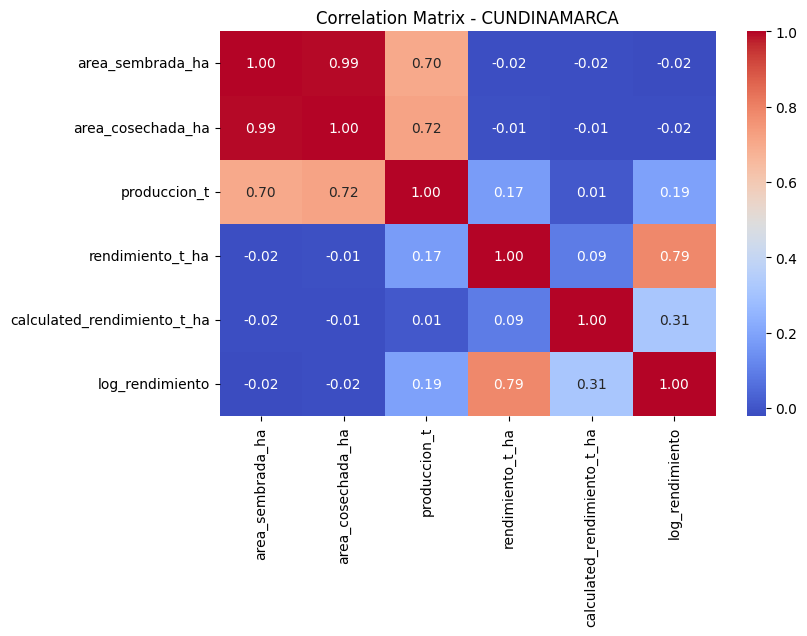

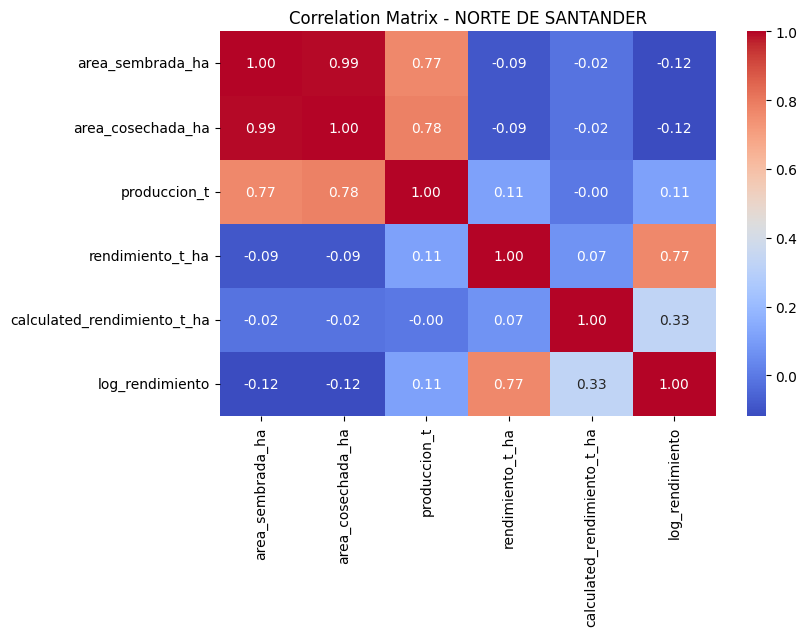

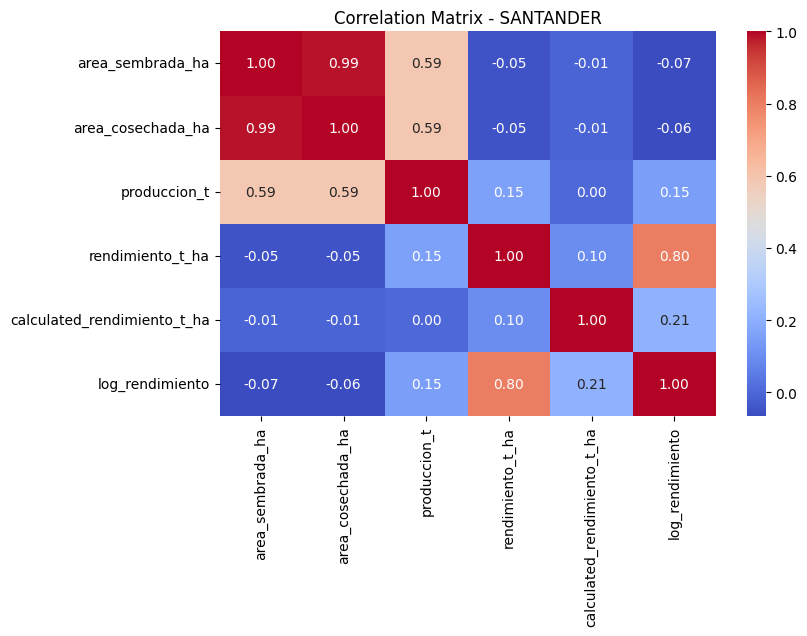

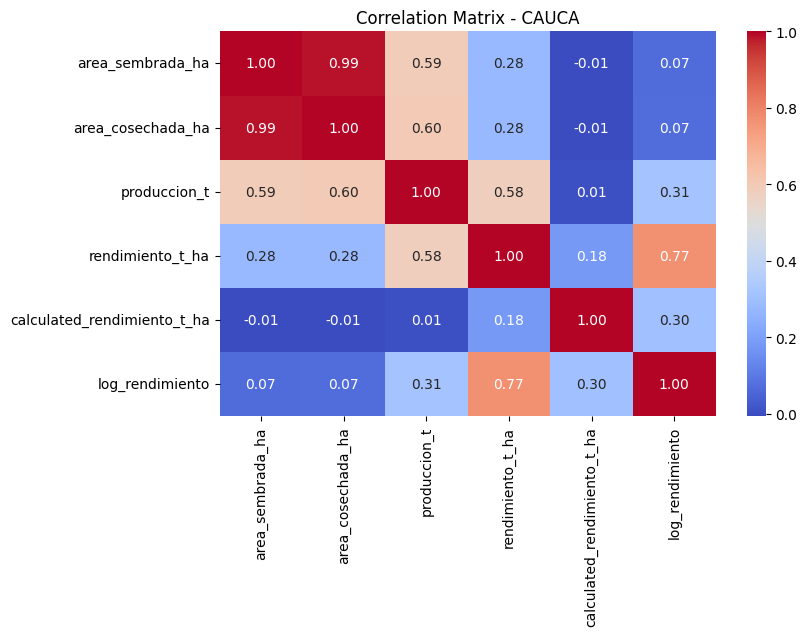

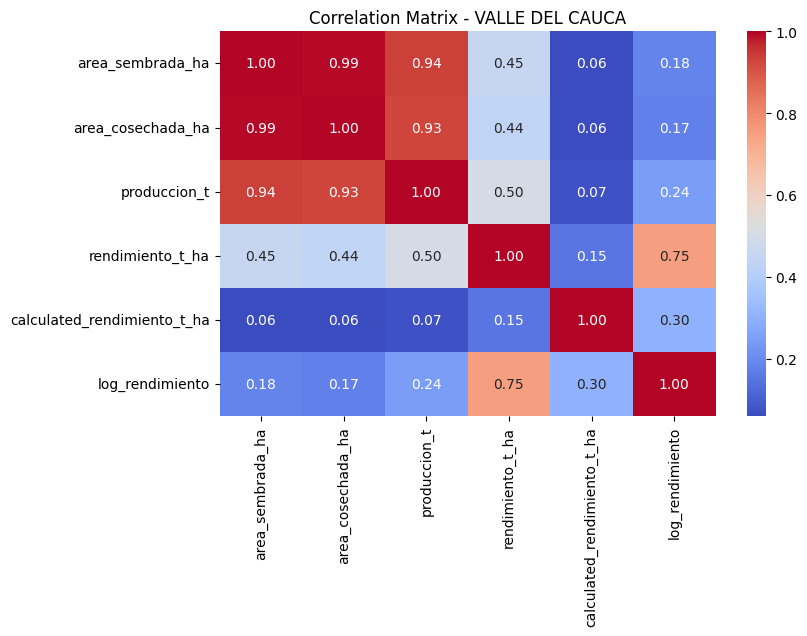

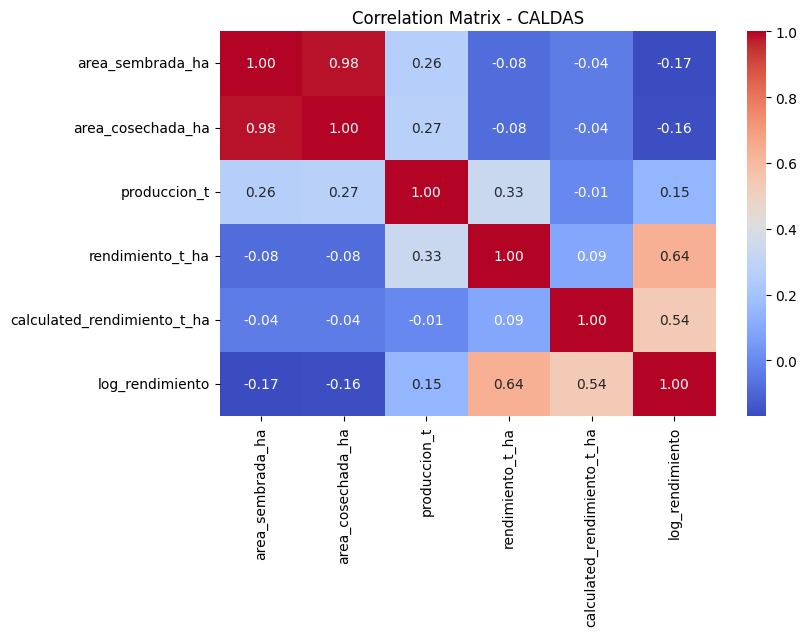

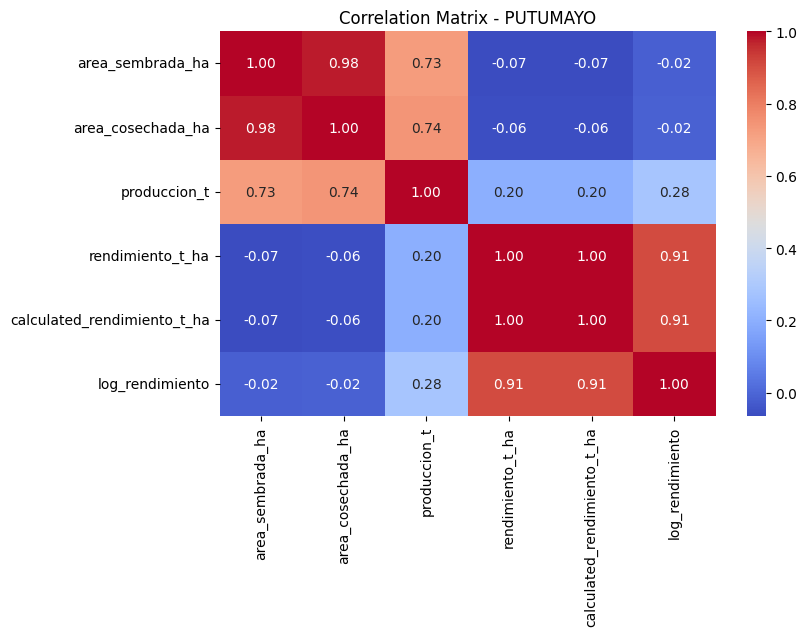

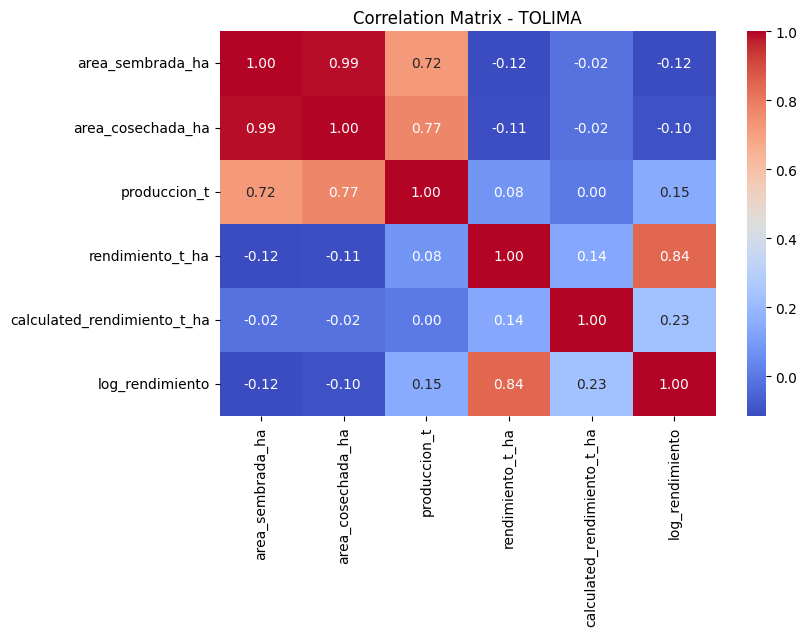

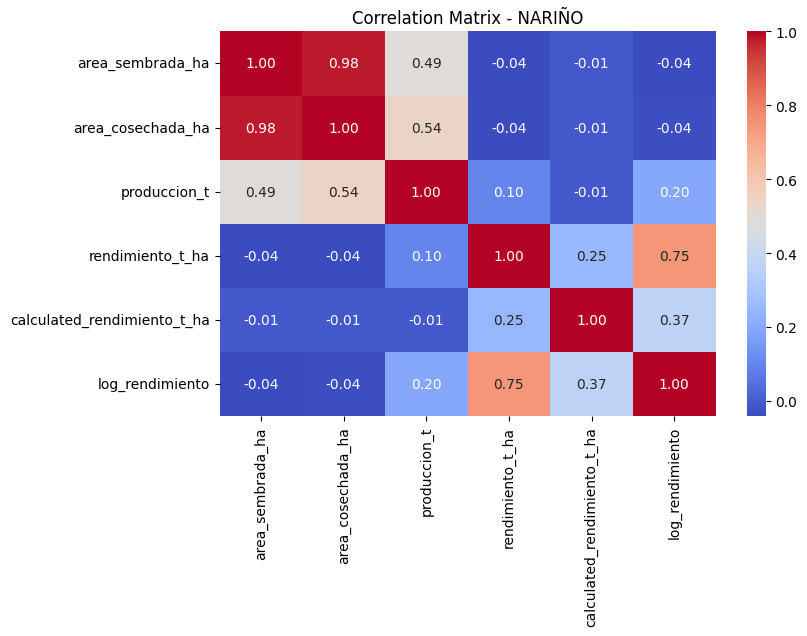

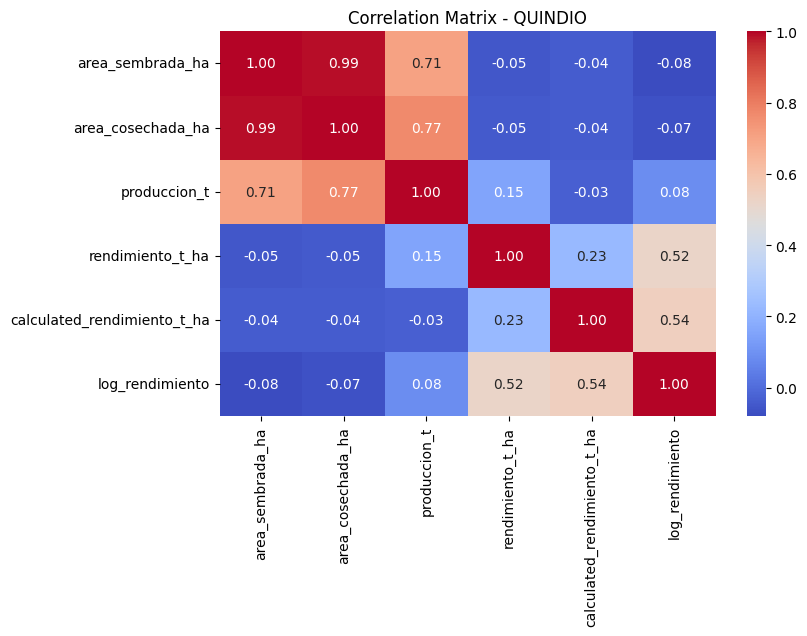

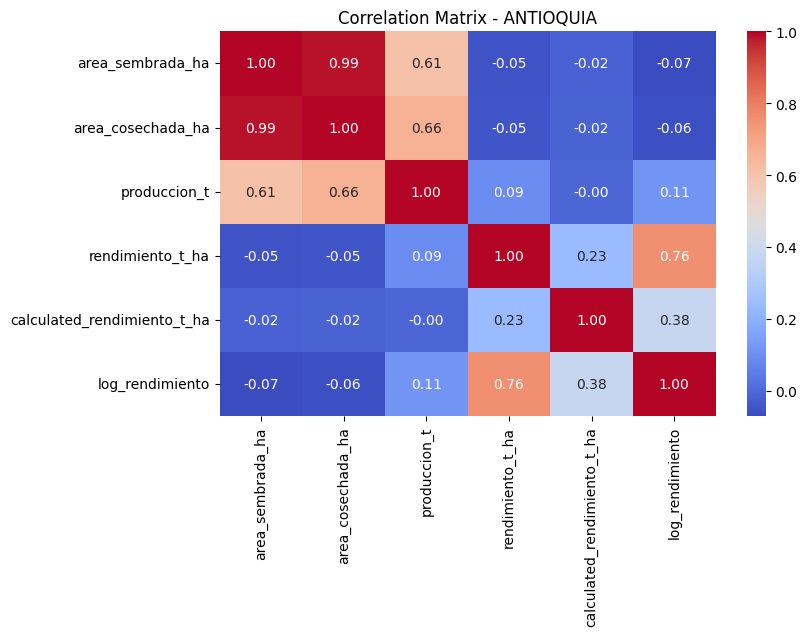

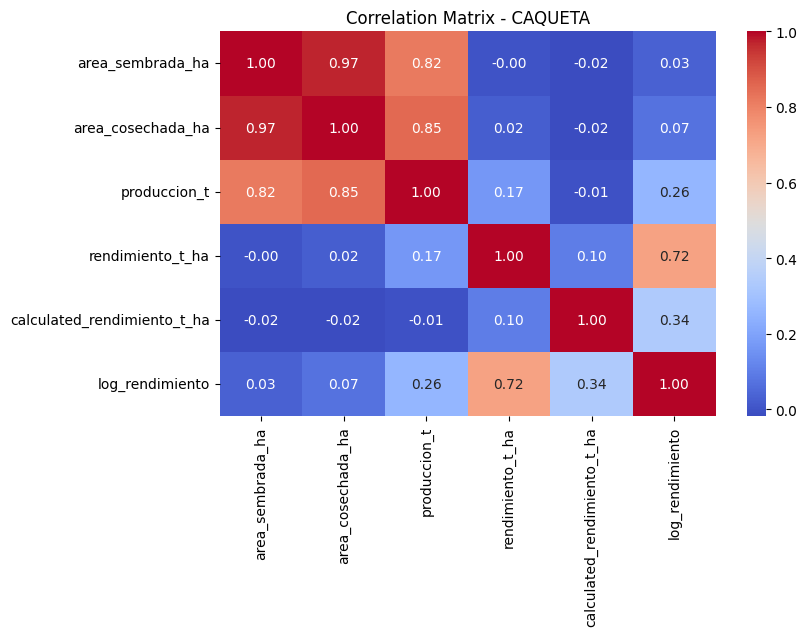

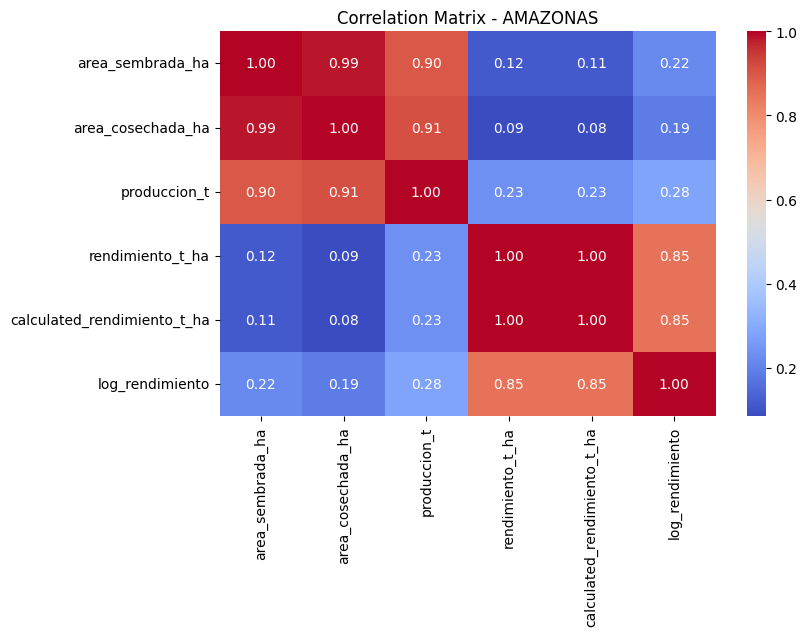

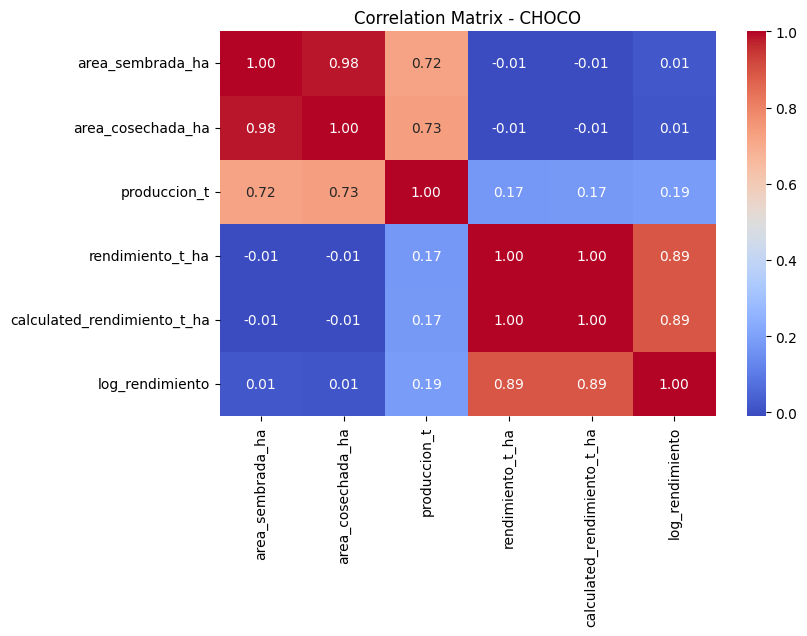

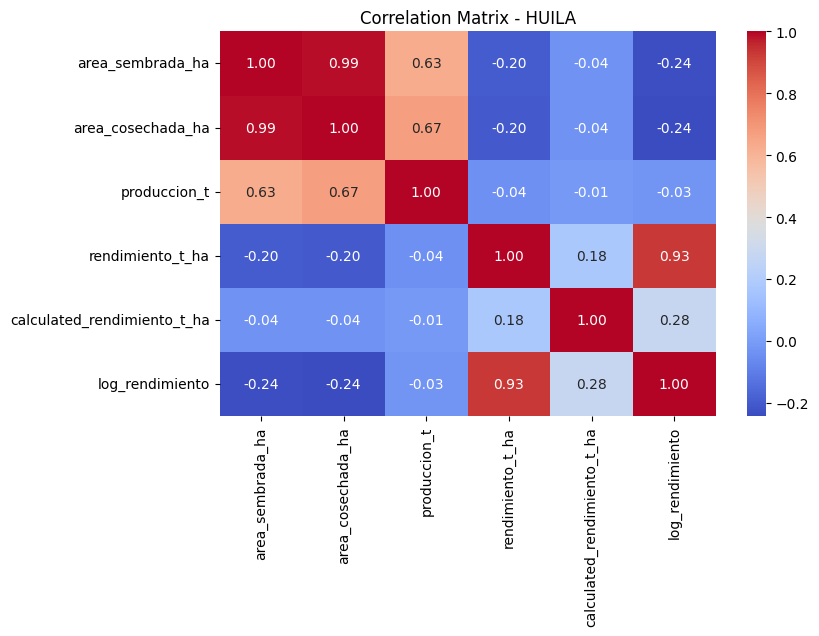

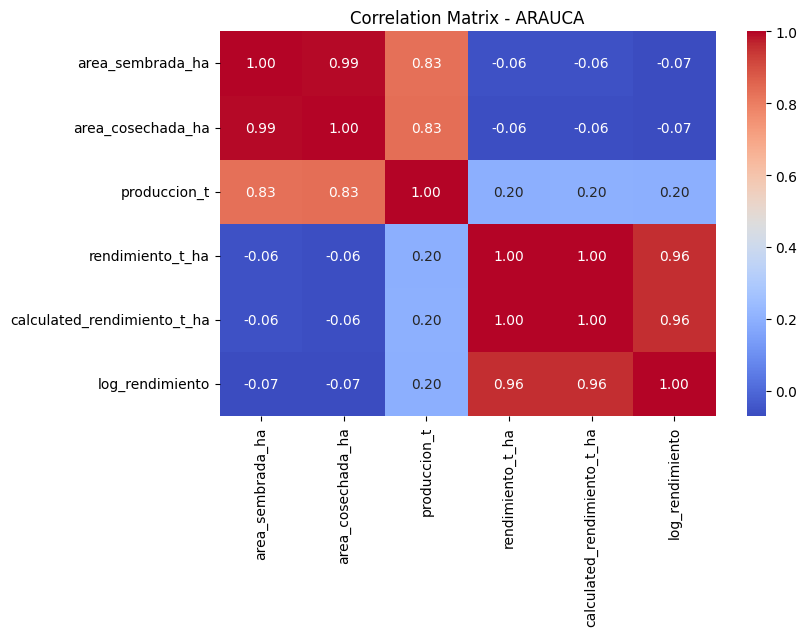

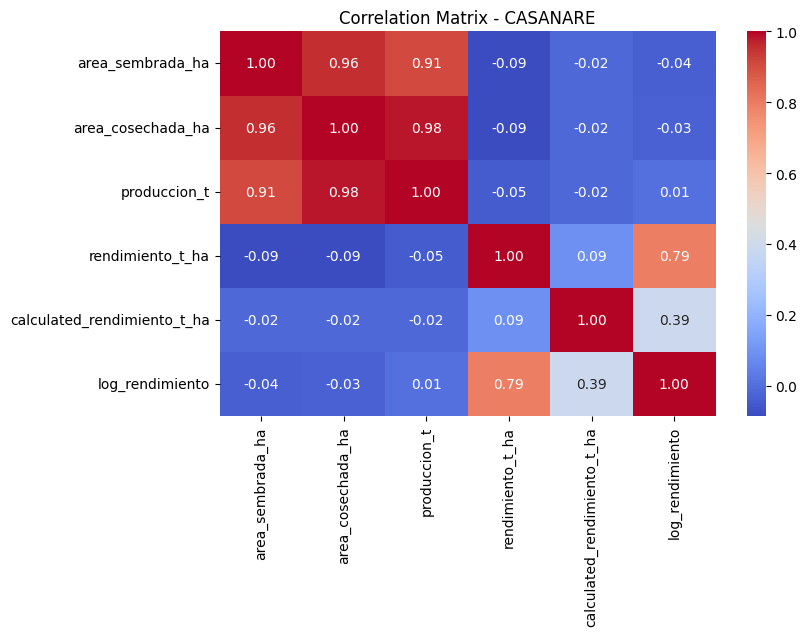

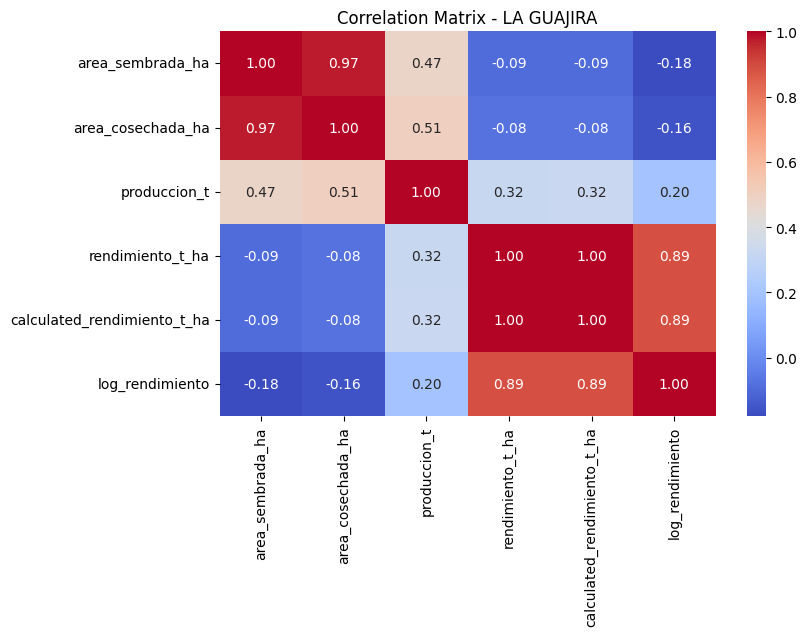

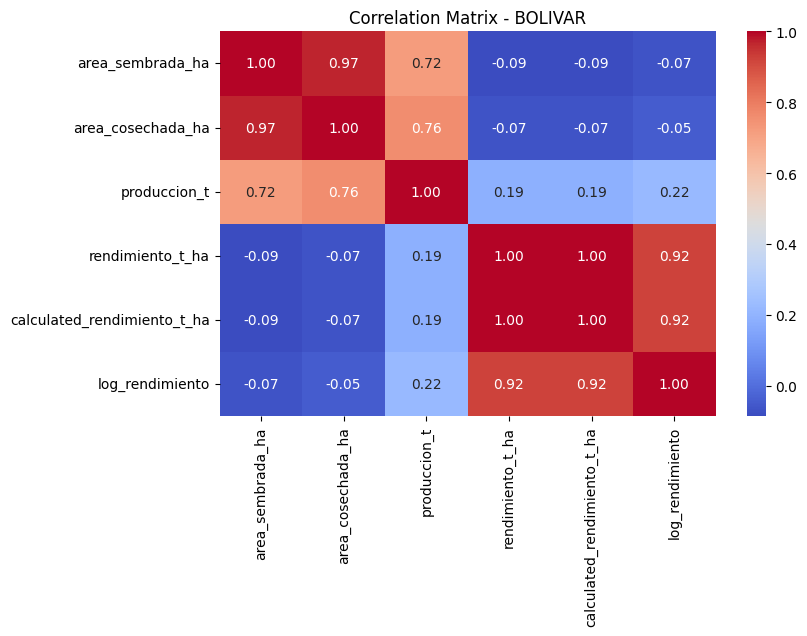

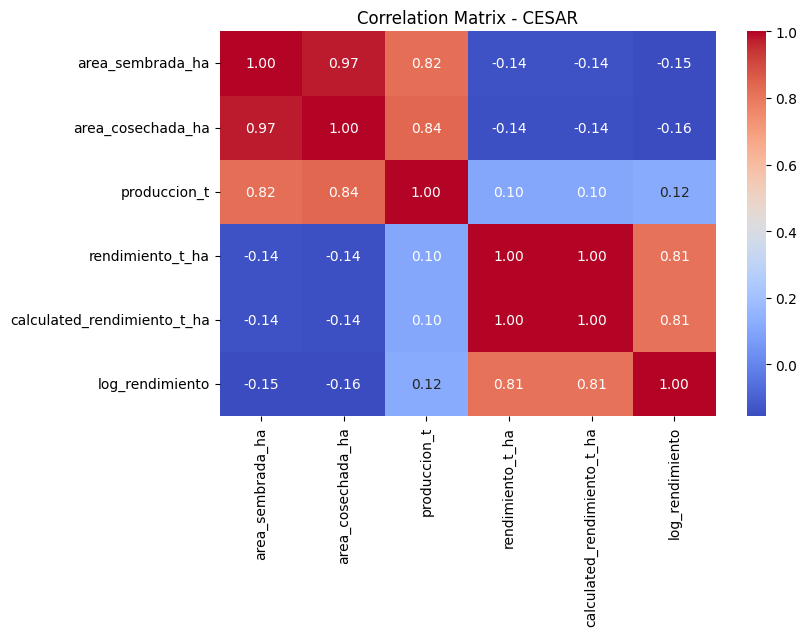

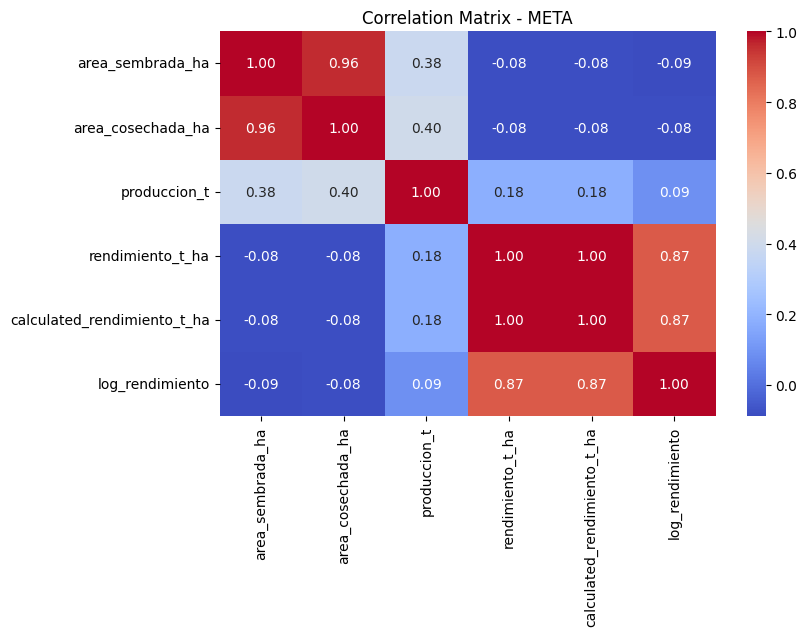

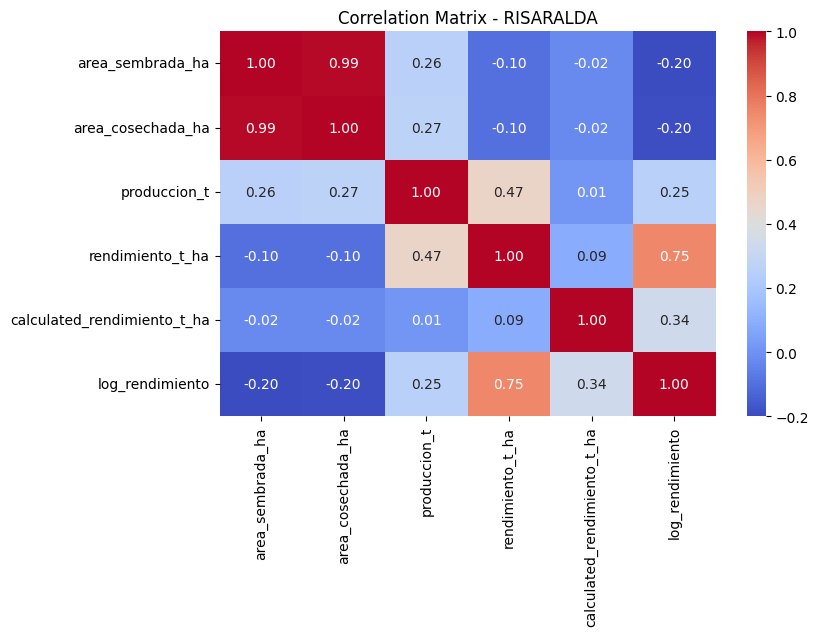

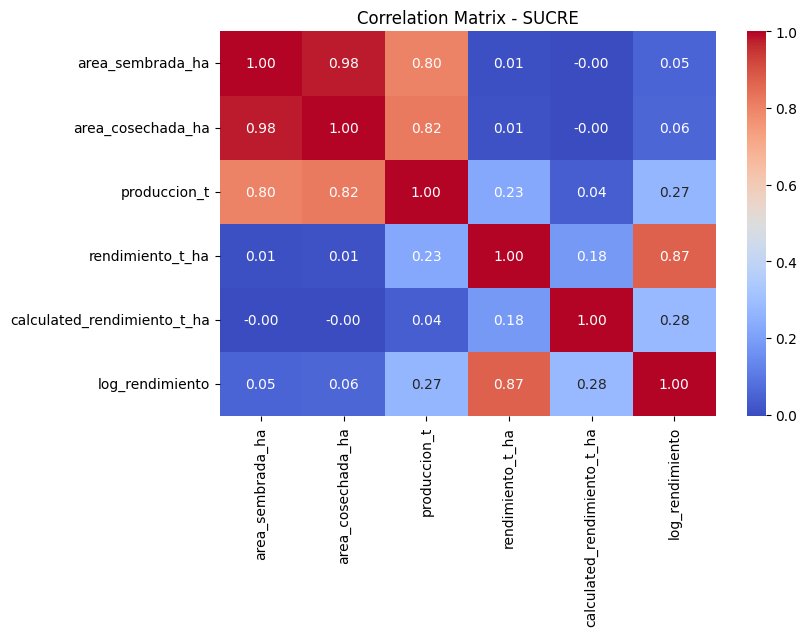

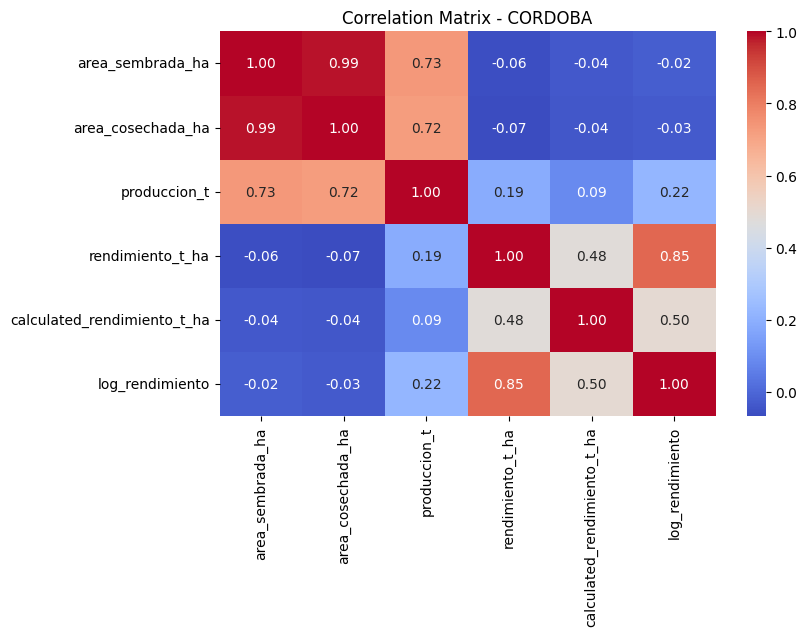

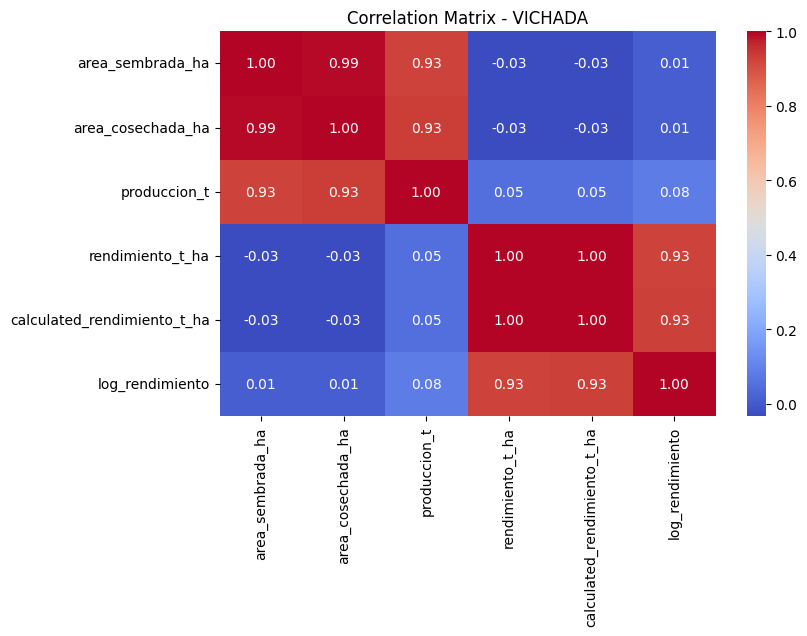

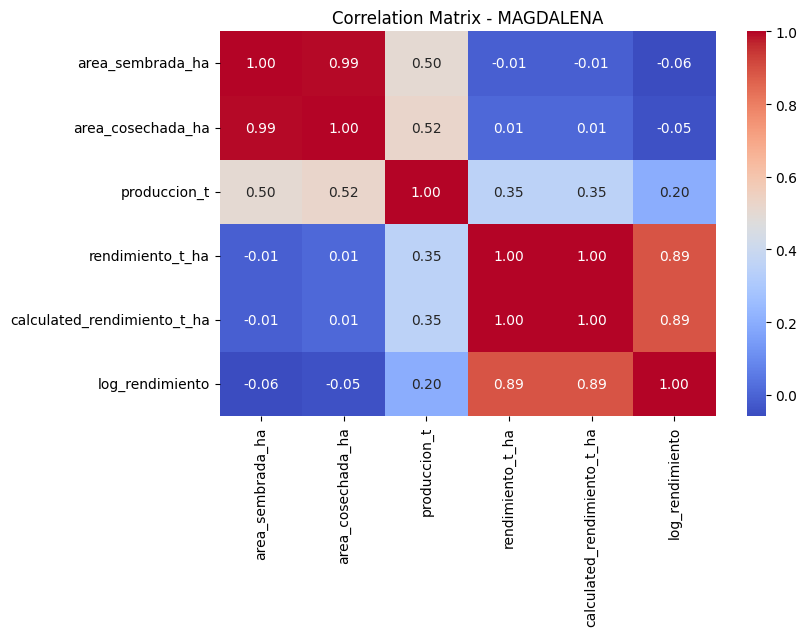

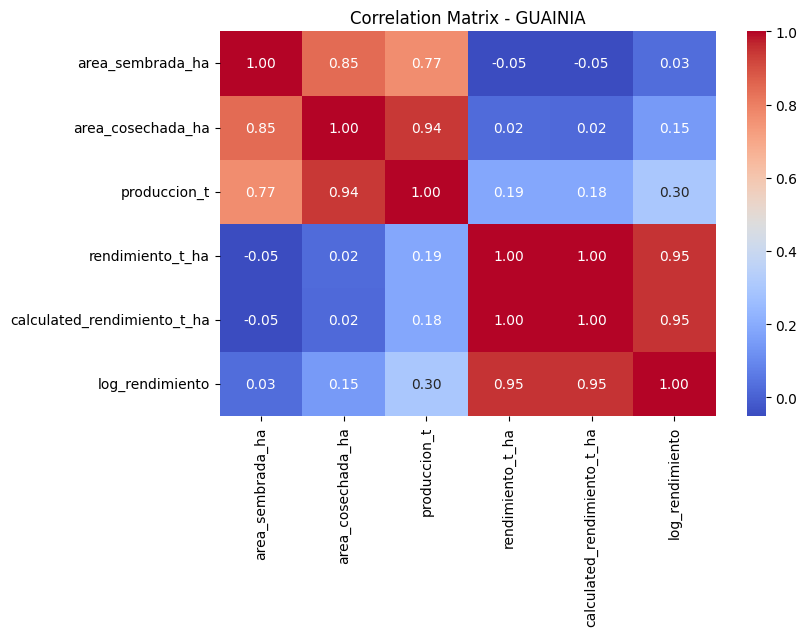

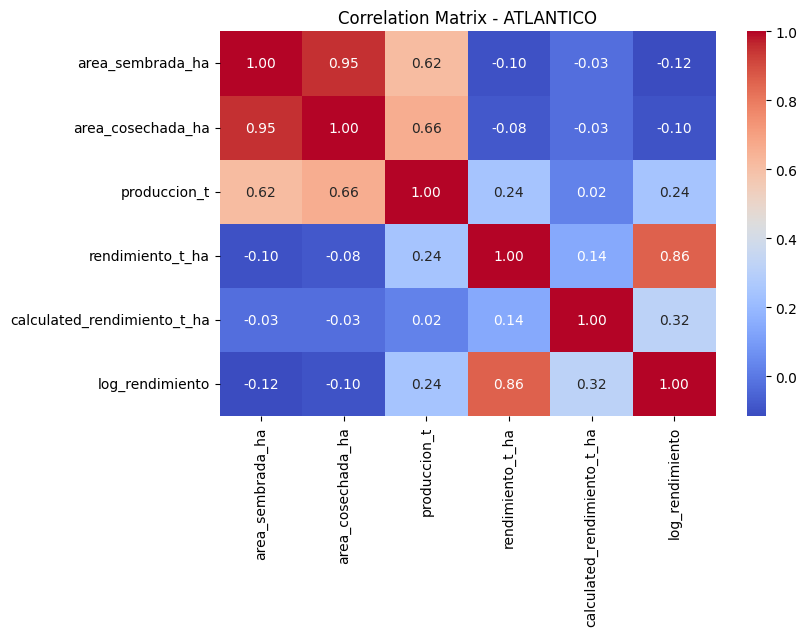

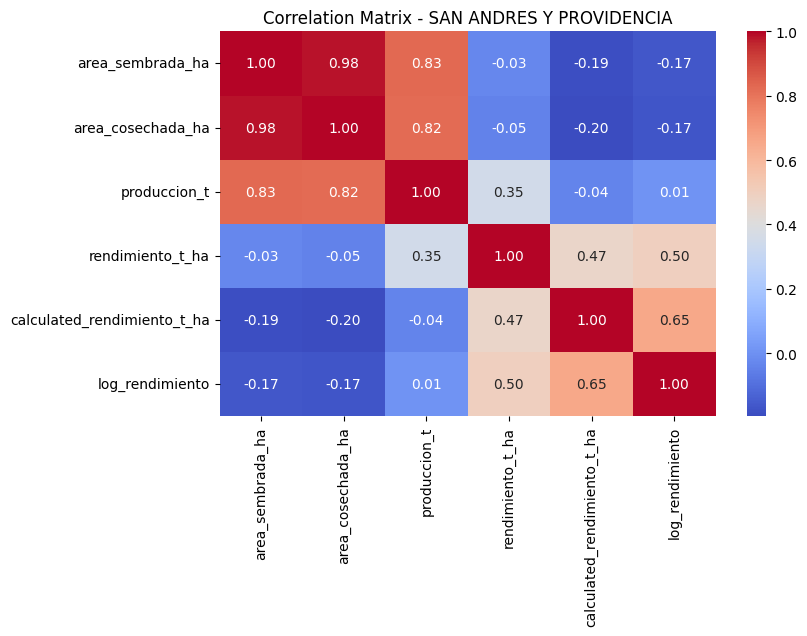

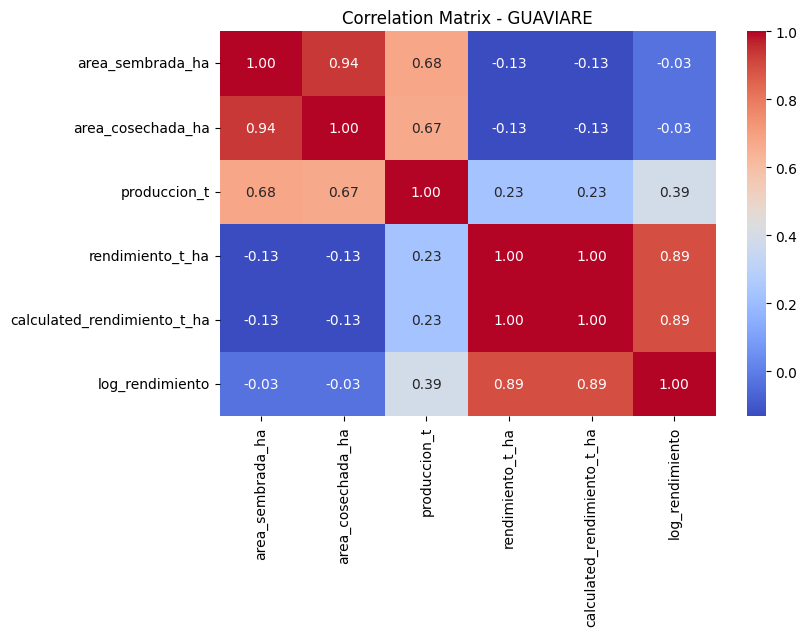

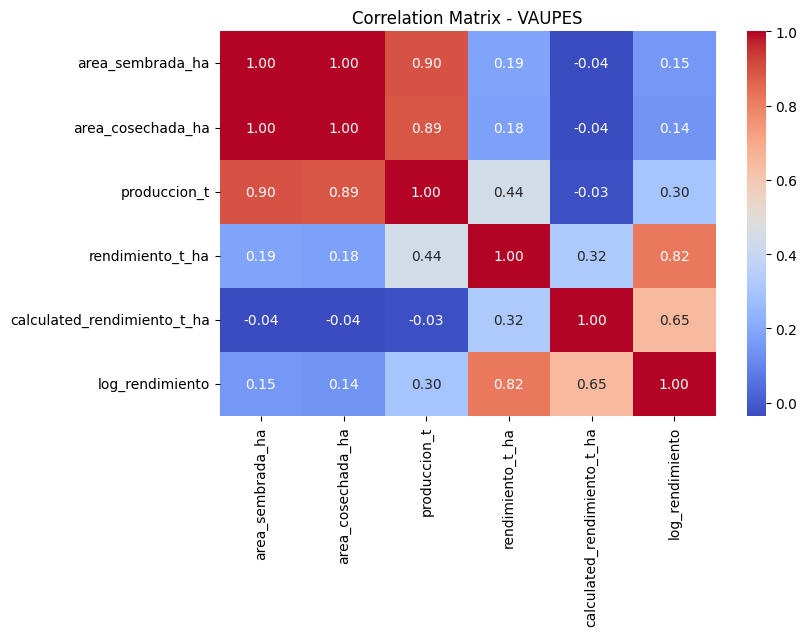

In [ ]:
# Get unique department names
departments = df["departamento"].unique()

# Loop through each department and create a heatmap
for dept in departments:
    plt.figure(figsize=(8, 5))

    # Compute correlation matrix for this department
    dept_corr = df[df["departamento"] == dept].select_dtypes(include=["float64", "int64"]).corr()

    # Only show heatmap if at least 2 numerical columns exist
    if dept_corr.shape[0] > 1:
        sns.heatmap(dept_corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Matrix - {dept}")
        plt.show()

## XX. Adding more visualizations (Histograms)


**** PODEMOS TAMBIEN HACER VISUALIZACION POR MEDIO DE HISTOGRAMAS, AGRUPANDO TIPOS DE COSECHA, DEPARTAMENTO, ETC***



# 13. Pareto Chart for Top Departments in the Last Year

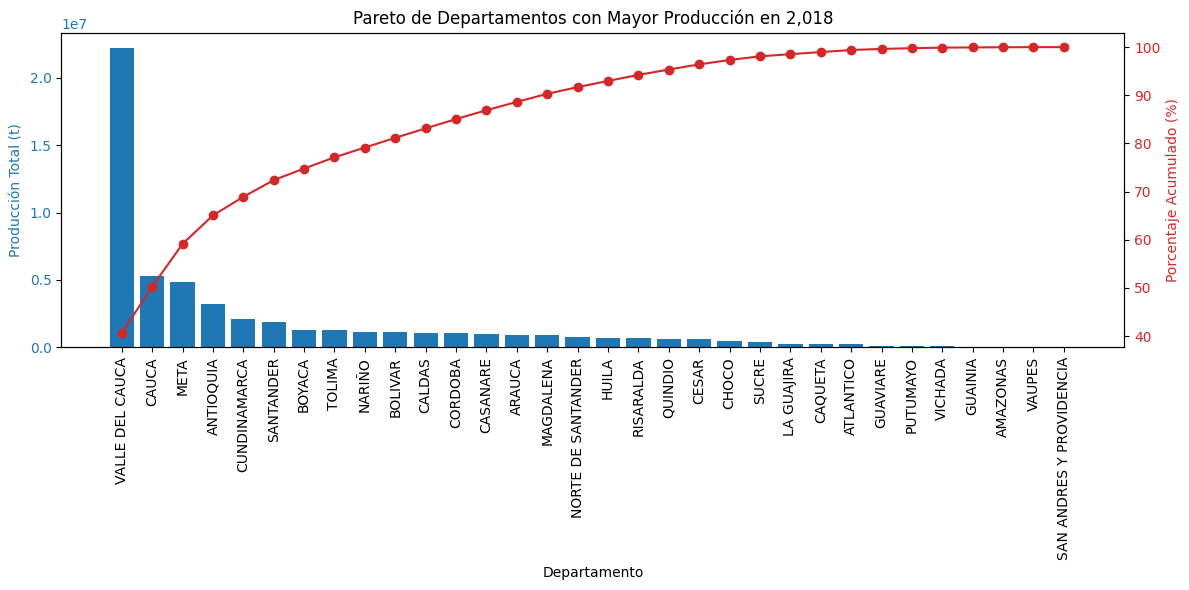

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the most recent year
last_year = df['año'].max()

# Filter data for the last year
last_year_data = df[df['año'] == last_year]

# Group by department and sum production
department_production = last_year_data.groupby('departamento')['produccion_t'].sum().reset_index()

# Sort departments by production in descending order
department_production = department_production.sort_values(by=['produccion_t'], ascending=False)

# Calculate cumulative percentage
department_production['cumulative_percentage'] = department_production['produccion_t'].cumsum() / department_production['produccion_t'].sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for production
ax1.bar(department_production['departamento'], department_production['produccion_t'], color='tab:blue')
ax1.set_xlabel('Departamento')
ax1.set_ylabel('Producción Total (t)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(department_production['departamento'], department_production['cumulative_percentage'], color='tab:red', marker='o')
ax2.set_ylabel('Porcentaje Acumulado (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title
plt.title(f'Pareto de Departamentos con Mayor Producción en {last_year}')

# Show the plot
plt.tight_layout()
plt.show()

Los departamentos con mayor produccióno en el útlimo año han sido, Valle del Cauca, Cauca, Meta, Antioquia, Cundinamarca y Santander.

# 14. Tipos de cultivo producidos por departamento el último año, para los departamentos pareto.

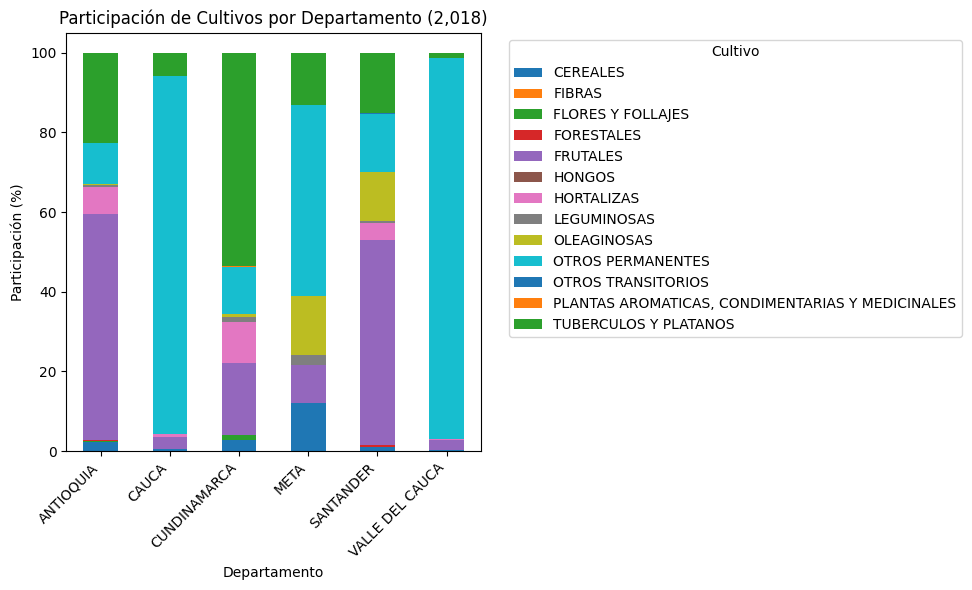

In [ ]:
# prompt: Quiero un gráfico de barras apiladas que muestre la participación por cultivo en cada departamento en último año, para los departamentos de Valle del Cauca, Cauca, Meta, Antioquia, Cundinamarca y Santander

import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it contains columns like 'departamento', 'grupo_cultivo', 'produccion_t', and 'año'
# and it is already filtered and processed as in the provided code.

# Filter for the specified departments and the last year
departments_to_show = ['VALLE DEL CAUCA', 'CAUCA', 'META', 'ANTIOQUIA', 'CUNDINAMARCA', 'SANTANDER']
last_year = df['año'].max()
filtered_df = df[(df['departamento'].isin(departments_to_show)) & (df['año'] == last_year)]


# Group the data by department and crop, then sum the production
grouped_data = filtered_df.groupby(['departamento', 'grupo_cultivo'])['produccion_t'].sum().unstack()

# Calculate the total production per department
total_production = grouped_data.sum(axis=1)

# Calculate the percentage of each crop in each department
percentage_data = grouped_data.div(total_production, axis=0) * 100

# Create the stacked bar plot
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the plot labels and title
ax.set_xlabel("Departamento")
ax.set_ylabel("Participación (%)")
ax.set_title(f"Participación de Cultivos por Departamento ({last_year})")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title="Cultivo", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


Se observa que en el Valle del cauca la variedad de grupos o tipos de cultivo es menor, con una gran participación de cultivos calsificados como otros permanentes, ademas se destaca la variedad en la producción agricola, en los departamentos de Antioquia, Cundinamarca, y santander. Después de los cultivos clasificados como Otros permanentes, los cultivos frutales tienen mayor participación en 3 de los principales departamentos productores del país, seguida de la producción de flores y follajes, principalmente en el departamento de Cundinamarca.

# 15. Frequency of values for each crop within the 'OTROS PERMANENTES' group in the last year

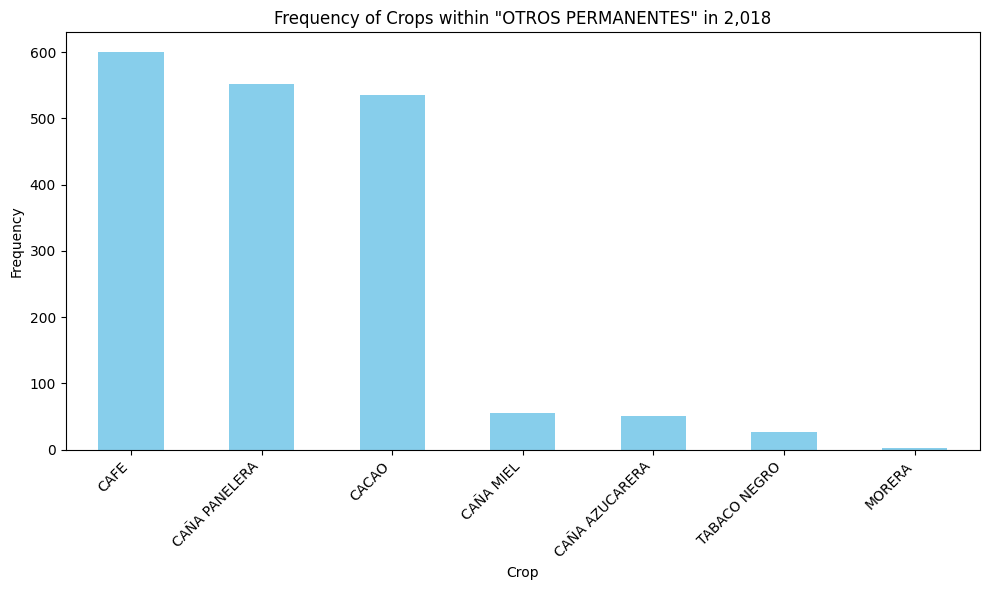

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the most recent year
last_year = df['año'].max()

# Filter data for the last year and 'OTROS PERMANENTES' group
filtered_df = df[(df['año'] == last_year) & (df['grupo_cultivo'] == 'OTROS PERMANENTES')]

# Count the frequency of each crop
crop_frequency = filtered_df['cultivo'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
crop_frequency.plot(kind='bar', color='skyblue')
plt.title(f'Frequency of Crops within "OTROS PERMANENTES" in {last_year}')
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

La producción clasificada como otros permanentes y que predomina en los departamentos del Valle del Cauca, Cauca y Meta, corresponden principalmente al cultivo de Café, diferentes variedades de caña de azucar y derivados y el cacao.

# 16. Pareto chart showing the production of each crop in the last year at the country level, highlighting the Pareto products

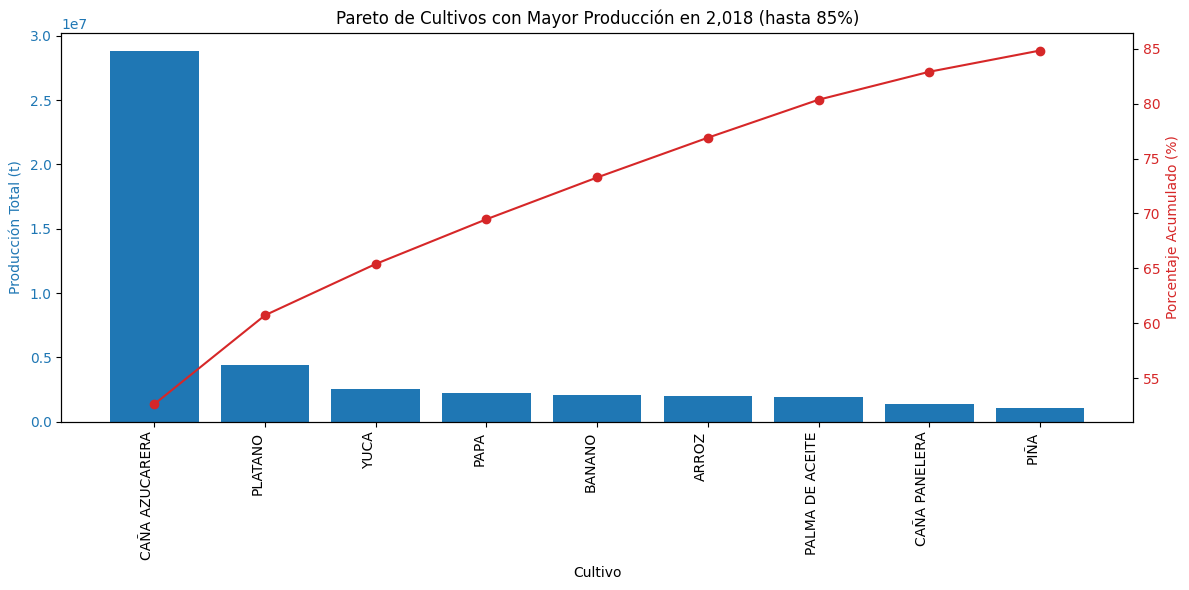

Pareto Crops (contributing to 85% of production):
['CAÑA AZUCARERA', 'PLATANO', 'YUCA', 'PAPA', 'BANANO', 'ARROZ', 'PALMA DE ACEITE', 'CAÑA PANELERA', 'PIÑA']


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the most recent year
last_year = df['año'].max()

# Filter data for the last year
last_year_data = df[df['año'] == last_year]

# Group by crop and sum production
crop_production = last_year_data.groupby('cultivo')['produccion_t'].sum().reset_index()

# Sort crops by production in descending order
crop_production = crop_production.sort_values(by=['produccion_t'], ascending=False)

# Calculate cumulative percentage
crop_production['cumulative_percentage'] = crop_production['produccion_t'].cumsum() / crop_production['produccion_t'].sum() * 100

# Find Pareto crops (crops contributing to 80% of production)
pareto_crops = crop_production[crop_production['cumulative_percentage'] <= 80]

# Find the index where cumulative percentage exceeds 85%
index_85 = crop_production['cumulative_percentage'].searchsorted(85, side='right')

# Select crops up to the 85% cumulative percentage
pareto_crops = crop_production.iloc[:index_85]

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for production (only for Pareto crops)
bars = ax1.bar(pareto_crops['cultivo'], pareto_crops['produccion_t'], color='tab:blue')
ax1.set_xlabel('Cultivo')
ax1.set_ylabel('Producción Total (t)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels

# Line plot for cumulative percentage (only for Pareto crops)
ax2 = ax1.twinx()
ax2.plot(pareto_crops['cultivo'], pareto_crops['cumulative_percentage'], color='tab:red', marker='o')
ax2.set_ylabel('Porcentaje Acumulado (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title
plt.title(f'Pareto de Cultivos con Mayor Producción en {last_year} (hasta 85%)')

# Show the plot
plt.tight_layout()
plt.show()

# Print Pareto crops
print("Pareto Crops (contributing to 85% of production):")
print(pareto_crops['cultivo'].tolist())

# 17. Graph showing the annual production trend for the specified main crop types ('PLATANO', 'YUCA', 'PAPA', 'BANANO', 'ARROZ', 'PALMA DE ACEITE', 'CAÑA PANELERA', 'PIÑA')
La gráfica muestra la evolución de la producción anual de los principales cultivos en toneladas, evidenciando tendencias diferenciadas. El plátano presenta un crecimiento sostenido y se consolida como el cultivo de mayor producción al final del período. La papa y el arroz muestran fluctuaciones notables, con incrementos y descensos en distintos años, destacando una caída abrupta al final del período. La palma de aceite y la piña exhiben una tendencia creciente, reflejando una mayor producción en los últimos años. Por otro lado, el banano y la caña panelera presentan variaciones moderadas sin cambios drásticos en su producción. Estas tendencias sugieren que ciertos cultivos han experimentado un impulso productivo, mientras que otros han enfrentado desafíos que han afectado su estabilidad.

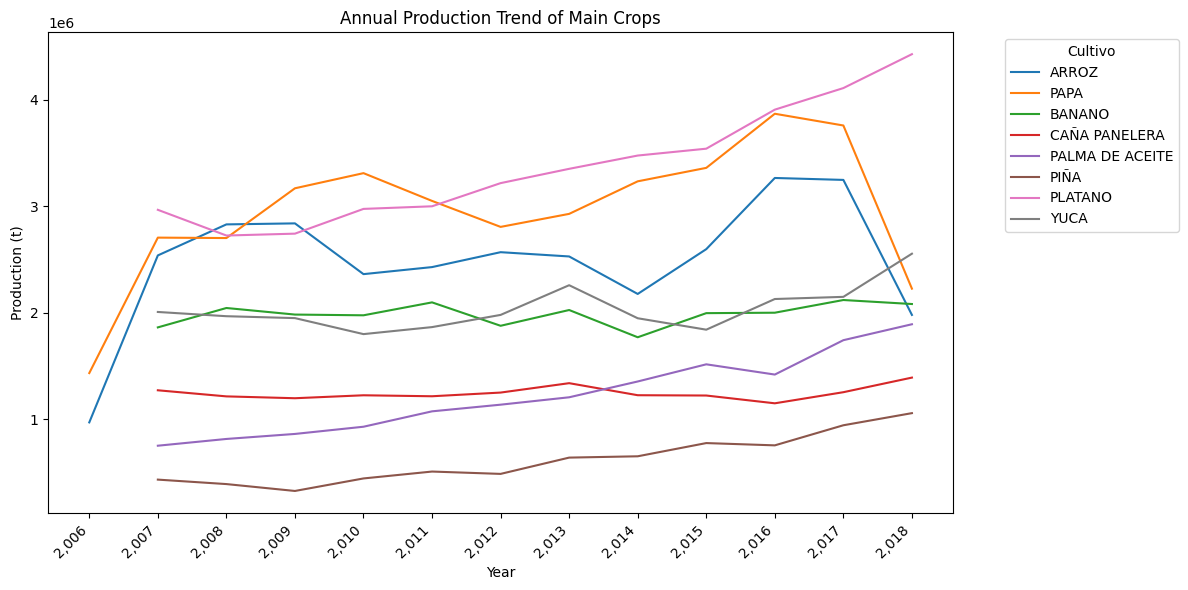

In [ ]:
# Define the main crop types
main_crops = ['PLATANO', 'YUCA', 'PAPA', 'BANANO', 'ARROZ', 'PALMA DE ACEITE', 'CAÑA PANELERA', 'PIÑA']

# Filter the DataFrame for the main crops
filtered_df = df[df['cultivo'].isin(main_crops)]

# Group by year and crop type, then sum production
grouped_data = filtered_df.groupby(['año', 'cultivo'])['produccion_t'].sum().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(data=grouped_data, x='año', y='produccion_t', hue='cultivo')
plt.title('Annual Production Trend of Main Crops')
plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

# 18. Crops with the highest calculated yield per hectare  (calculated_rendimiento_t_ha) by year
La gráfica muestra la evolución del rendimiento calculado por hectárea de los cinco cultivos más productivos en cada año, representados mediante barras apiladas. Se observa que la caña de azúcar es el cultivo con mayor rendimiento constante a lo largo del período, ocupando una proporción significativa en cada año. Otros cultivos, como el champiñón, el cebollín, la chamba y el tomate, han variado su participación en los primeros lugares dependiendo del año. Además, en ciertos años se observa una mayor diversidad en los cultivos con alto rendimiento, mientras que en otros la producción está dominada por unos pocos cultivos. Estas variaciones pueden estar relacionadas con factores climáticos, tecnológicos o de demanda del mercado que han influido en la productividad agrícola.

<ipython-input-236-579af74bec57>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_crops_by_year = yield_by_year_crop.groupby('año').apply(lambda x: x.nlargest(top_n, 'calculated_rendimiento_t_ha')).reset_index(drop=True)


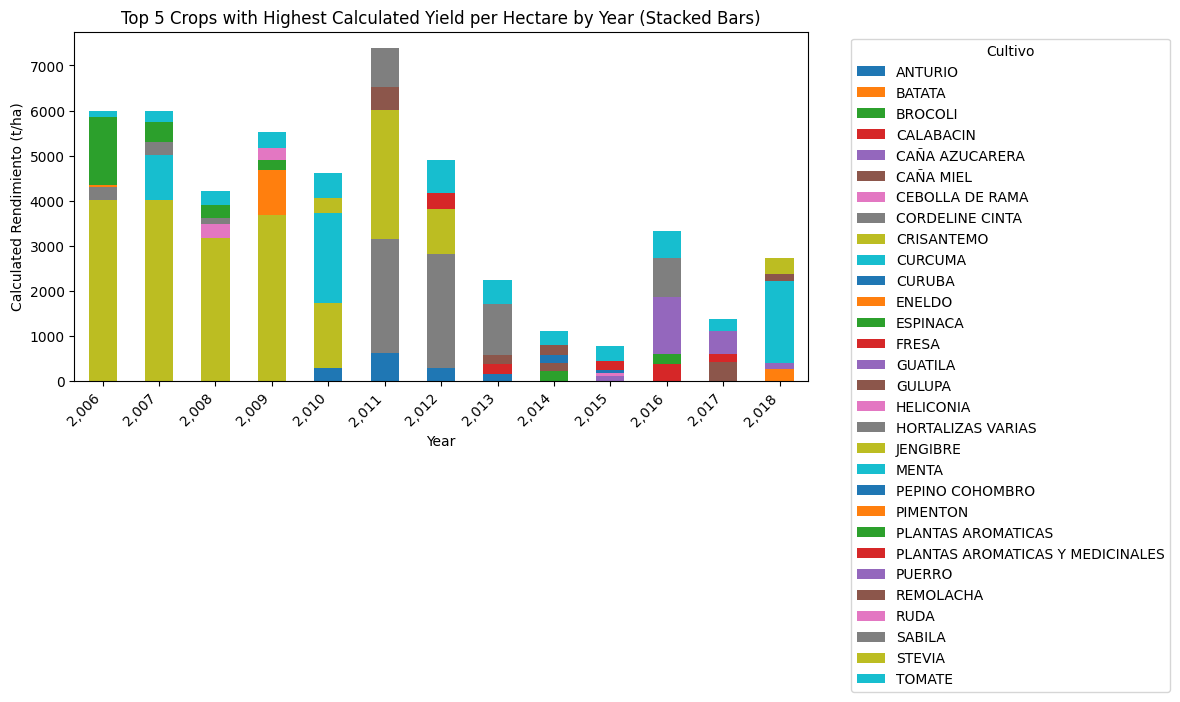

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by year and crop, then calculate average yield
yield_by_year_crop = df.groupby(['año', 'cultivo'])['calculated_rendimiento_t_ha'].mean().reset_index()

# Get top N crops for each year
top_n = 5  # Number of top crops to display
top_crops_by_year = yield_by_year_crop.groupby('año').apply(lambda x: x.nlargest(top_n, 'calculated_rendimiento_t_ha')).reset_index(drop=True)

# Pivot the data to create a matrix for the stacked bar chart
yield_matrix = top_crops_by_year.pivot_table(index='año', columns='cultivo', values='calculated_rendimiento_t_ha', fill_value=0)

# Create the stacked bar chart
ax = yield_matrix.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set the plot labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Calculated Rendimiento (t/ha)")
ax.set_title(f"Top {top_n} Crops with Highest Calculated Yield per Hectare by Year (Stacked Bars)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title="Cultivo", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-237-44622932d939>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


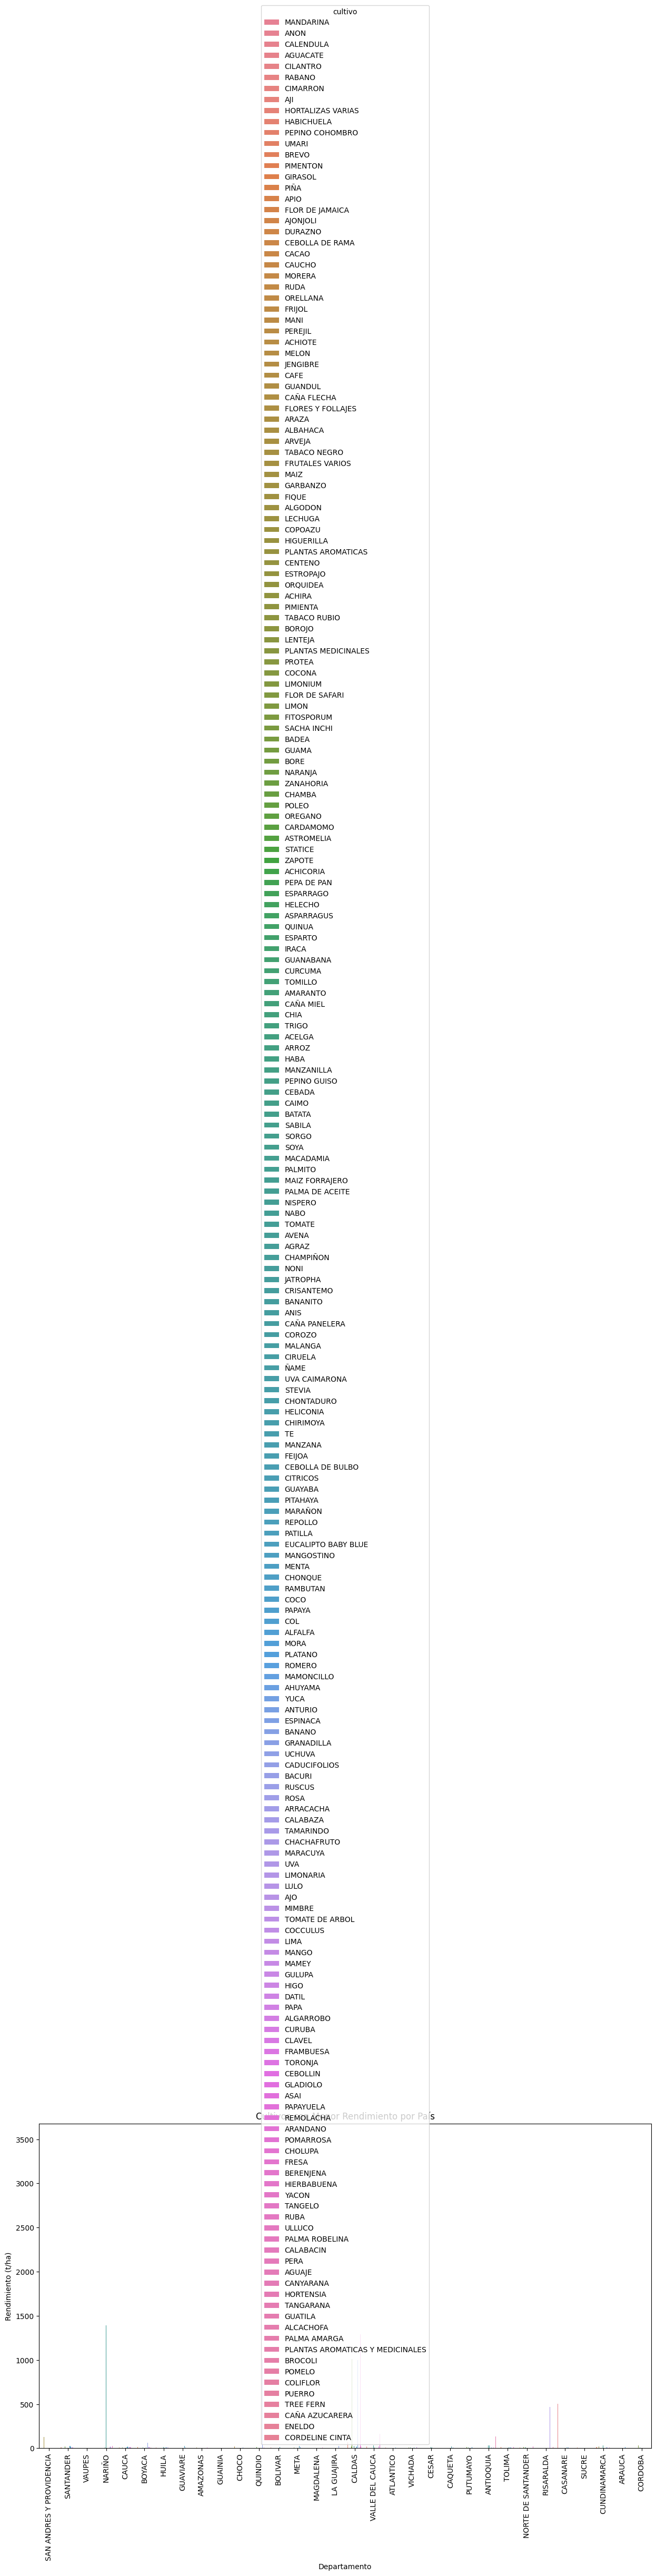

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'departamento' and 'cultivo', then calculate the mean 'calculated_rendimiento_t_ha'
yield_by_department_crop = df.groupby(['departamento', 'cultivo'])['calculated_rendimiento_t_ha'].mean().reset_index()

# Sort values to find crops with the lowest yield
yield_by_department_crop = yield_by_department_crop.sort_values(by='calculated_rendimiento_t_ha')

# Create the plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.barplot(data=yield_by_department_crop, x='departamento', y='calculated_rendimiento_t_ha', hue='cultivo')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Cultivos con Menor Rendimiento por País')
plt.xlabel('Departamento')
plt.ylabel('Rendimiento (t/ha)')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

departamento   municipio grupo_cultivo subgrupo_cultivo cultivo  \
0              BOYACA    BUSBANZA    HORTALIZAS           ACELGA  ACELGA   
1        CUNDINAMARCA      SOACHA    HORTALIZAS           ACELGA  ACELGA   
2        CUNDINAMARCA        COTA    HORTALIZAS           ACELGA  ACELGA   
3  NORTE DE SANTANDER  LOS PATIOS    HORTALIZAS           ACELGA  ACELGA   
4  NORTE DE SANTANDER    PAMPLONA    HORTALIZAS           ACELGA  ACELGA   

  desagregacion_regional    año periodo  area_sembrada_ha  area_cosechada_ha  \
0                 ACELGA  2,006   2006B               2.0                1.0   
1                 ACELGA  2,006   2006B              82.0               80.0   
2                 ACELGA  2,006   2006B               2.0                2.0   
3                 ACELGA  2,006   2006B               3.0                3.0   
4                 ACELGA  2,006   2006B               1.0                1.0   

   produccion_t  rendimiento_t_ha estado_fisico_produccion ciclo_cultivo  \
0           1.0              1.00             FRUTO FRESCO   TRANSITORIO   
1        1440.0             18.00             FRUTO FRESCO   TRANSITORIO   
2          26.0             17.33             FRUTO FRESCO   TRANSITORIO   
3          48.0             16.00             FRUTO FRESCO   TRANSITORIO   
4           5.0             10.00             FRUTO FRESCO   TRANSITORIO   

   calculated_rendimiento_t_ha  log_rendimiento  
0                          1.0         0.693147  
1                         18.0         2.944439  
2                         13.0         2.639057  
3                         16.0         2.833213  
4                          5.0         1.791759

-----------------  **Valle del Cauca - Analysis** -----------------


Valle del Cauca is one of Colombia's most agriculturally productive regions, known for its diverse crop cultivation and high agricultural output. The region’s climate, soil fertility, and irrigation infrastructure make it ideal for growing a variety of crops, including sugarcane, bananas, coffee, and citrus fruits. Understanding both total production and yield (production per hectare) is crucial for optimizing resource allocation, improving farming practices, and increasing efficiency in the agricultural sector.

In [ ]:
# prompt: Choose a deparmento Valle del cauca and extract the 5 most cultivos with mayor producción

import pandas as pd

# Assuming your DataFrame is named 'df'
# and it contains columns 'departamento', 'cultivo', and 'produccion_t'

# Filter data for Valle del Cauca
valle_del_cauca_df = df[df['departamento'] == 'VALLE DEL CAUCA']

# Group by crop and sum production
crop_production = valle_del_cauca_df.groupby('cultivo')['produccion_t'].sum()

# Sort by production in descending order and get the top 5
top_5_crops = crop_production.sort_values(ascending=False).head(5)

top_5_crops


cultivo
CAÑA AZUCARERA    217934254.0
PLATANO             2631811.0
MAIZ                1559873.0
CITRICOS            1559773.0
PIÑA                1266602.0
Name: produccion_t, dtype: float64

<ipython-input-200-0904e33e0a97>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cultivo', y='produccion_t', data=valle_del_cauca_df[valle_del_cauca_df['cultivo'].isin(top_10_crops.index)], palette=palette)  # Apply the color palette)


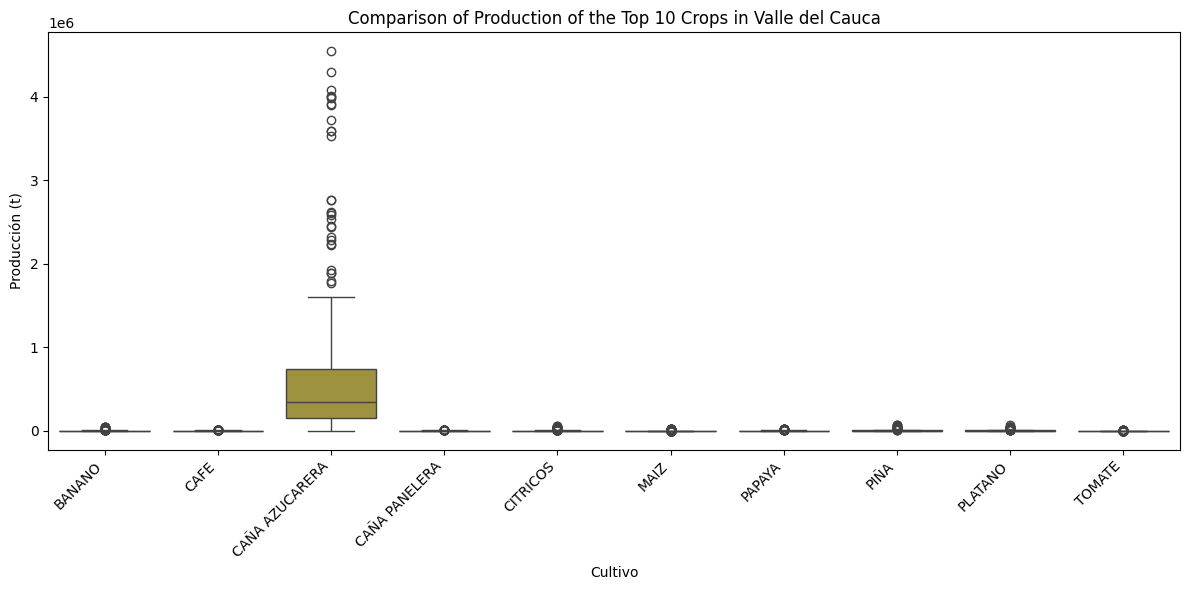

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already loaded and preprocessed
# Filter data for Valle del Cauca
valle_del_cauca_df = df[df['departamento'] == 'VALLE DEL CAUCA']

# Group by crop and sum production
crop_production = valle_del_cauca_df.groupby('cultivo')['produccion_t'].sum()

# Sort by production in descending order and get the top 10
top_10_crops = crop_production.sort_values(ascending=False).head(10)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='cultivo', y='produccion_t', data=valle_del_cauca_df[valle_del_cauca_df['cultivo'].isin(top_10_crops.index)], palette=palette)  # Apply the color palette)
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Production of the Top 10 Crops in Valle del Cauca')
plt.xlabel('Cultivo')
plt.ylabel('Producción (t)')
plt.tight_layout()
plt.show()


Analysis of Crop Production (First Graph)
•	Sugarcane (Caña Azucarera) is the dominant crop, with significantly higher production than all other crops. This is due to its extensive cultivation and high demand for sugar and ethanol production.
•	The other crops (banano, café, cítricos, maíz, papaya, piña, plátano, tomate, caña panelera) have much lower production values.
•	There is high variability in sugarcane production, with many outliers, indicating that some areas produce exceptionally large quantities compared to others.
•	The smaller interquartile ranges (IQR) for most crops suggest that their production levels are more consistent and stable across different regions.


In [ ]:
top_10_crops

cultivo
CAÑA AZUCARERA    217934254.0
PLATANO             2631811.0
MAIZ                1559873.0
CITRICOS            1559773.0
PIÑA                1266602.0
BANANO              1096887.0
CAFE                 702912.0
PAPAYA               569124.0
CAÑA PANELERA        458661.0
TOMATE               425080.0
Name: produccion_t, dtype: float64

<ipython-input-202-74cf75f6eecb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


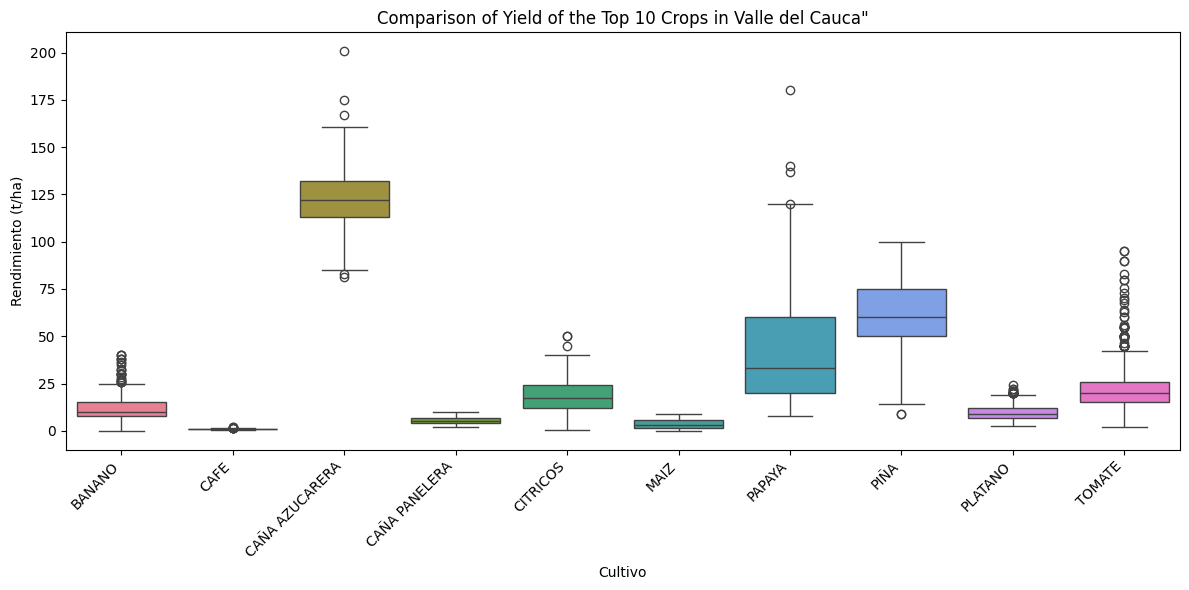

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with distinct colors
palette = sns.color_palette("husl", 10)  # You can change "husl" to another palette like "Set2", "pastel", etc.

# Create the boxplot with different colors
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cultivo',
    y='rendimiento_t_ha',
    data=valle_del_cauca_df[valle_del_cauca_df['cultivo'].isin(top_10_crops.index)],
    palette=palette  # Apply the color palette
)

# Customize plot appearance
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Yield of the Top 10 Crops in Valle del Cauca"')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (t/ha)')
plt.tight_layout()

# Show the plot
plt.show()


Sugarcane remains a high performer in terms of yield, with values ranging from 75 to over 150 t/ha, demonstrating high productivity per unit of land.
Papaya and Piña also show strong yields, with some extreme values exceeding 175 t/ha, indicating that these crops are highly efficient despite lower total production.
Bananas and tomatoes have a wide range of yields, with many outliers, suggesting variability in farming techniques, soil quality, or weather conditions.
Coffee (Café) has the lowest yield, highlighting its nature as a long-term, lower-output crop compared to others.

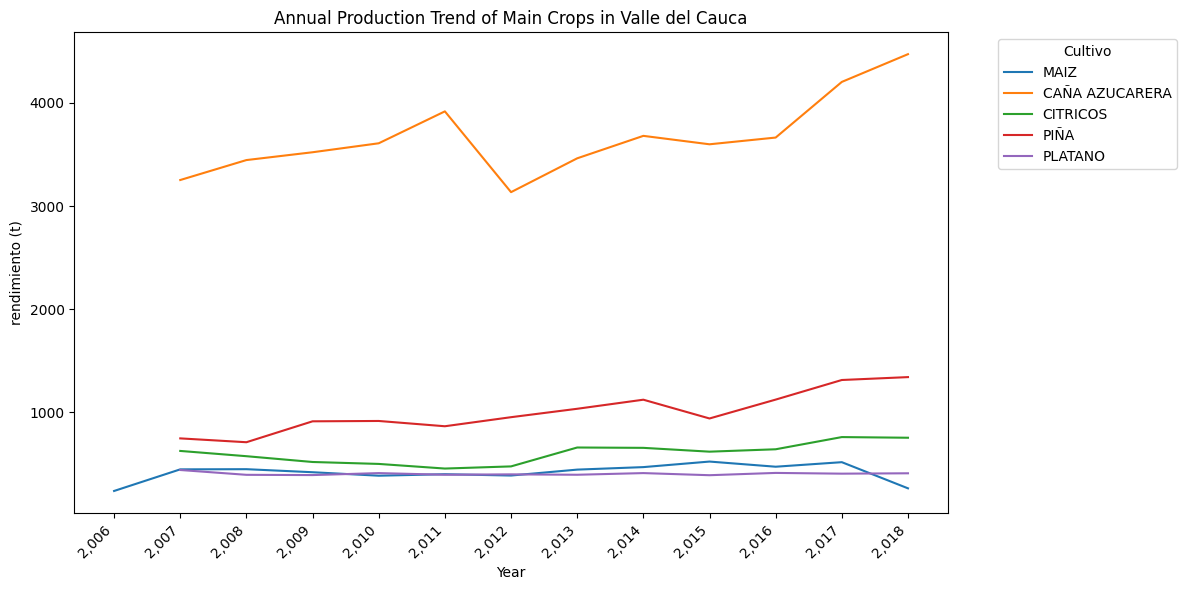

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and is already loaded

# Define the main crop types
main_crops = ['CAÑA AZUCARERA', 'PLATANO', 'MAIZ', 'CITRICOS', 'PIÑA']

# Filter the DataFrame for the main crops
filtered_df = valle_del_cauca_df[valle_del_cauca_df['cultivo'].isin(main_crops)]

# Group by year and crop type, then sum production
grouped_data = filtered_df.groupby(['año', 'cultivo'])['rendimiento_t_ha'].sum().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(data=grouped_data, x='año', y='rendimiento_t_ha', hue='cultivo')
plt.title('Annual Production Trend of Main Crops in Valle del Cauca')
plt.xlabel('Year')
plt.ylabel('rendimiento (t)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

**Sugarcane (Caña Azucarera) remains dominant.**

•	It continues to show steady growth with minor fluctuations, reflecting its importance in the sugar and ethanol industries.
•	After a dip around 2012, sugarcane production recovered and showed strong upward growth from 2015 onward.
**Pineapple (Piña) production has increased significantly**
•	It started at a lower level but has experienced steady growth, especially after 2010.
•	The increase may be due to rising demand, improved agricultural techniques, or increased land allocation.
**Citrus (Cítricos) production remains relatively stable**
•	It shows slight fluctuations but no drastic changes, indicating consistent market demand and stable farming conditions.
•  Maize (Maíz) and Plantain (Plátano) have remained at lower production levels
•	Maize shows a brief increase but declines toward the end of the period, possibly due to competition from other crops or lower profitability.
•	Plantain remains relatively constant, with minor fluctuations.


**Zapote in Colombia**


<ipython-input-246-95964570c14f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cultivo', y='calculated_rendimiento_t_ha', data=filtered_df, ci=None)  # ci=None removes error bars


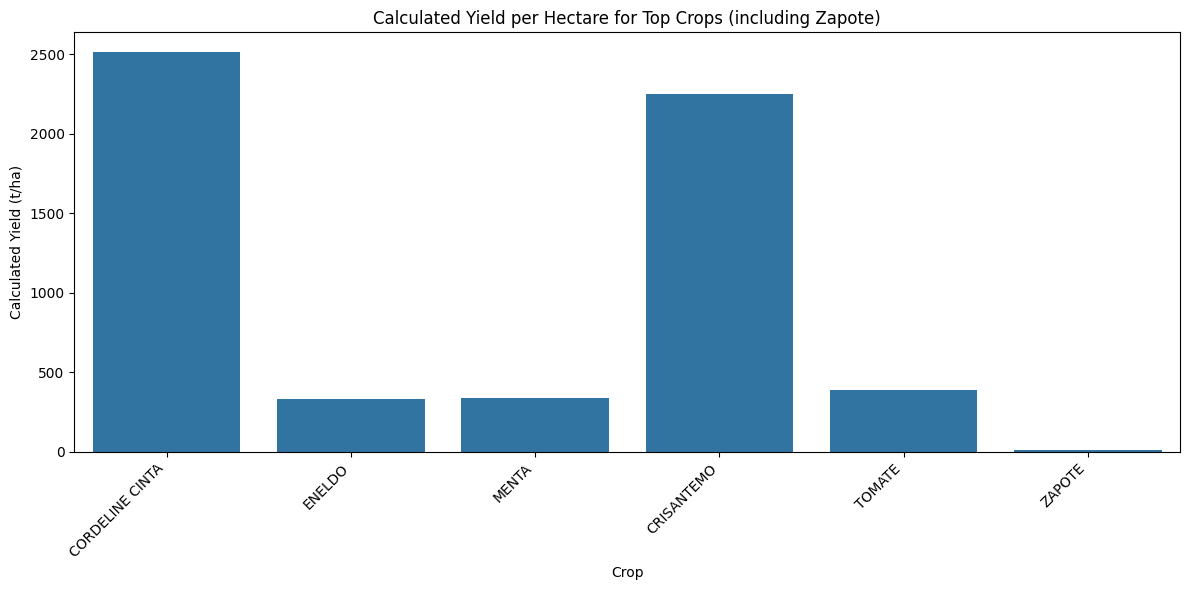

In [ ]:

# Assuming your DataFrame is named 'df'

# Find the top 5 crops with the highest average yield
top_crops = df.groupby('cultivo')['calculated_rendimiento_t_ha'].mean().nlargest(5).index.tolist()

# Add 'ZAPOTE' to the list of crops to plot
top_crops.append('ZAPOTE')

# Filter the DataFrame for the selected crops
filtered_df = df[df['cultivo'].isin(top_crops)]

# Create the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='cultivo', y='calculated_rendimiento_t_ha', data=filtered_df, ci=None)  # ci=None removes error bars
plt.title("Calculated Yield per Hectare for Top Crops (including Zapote)")
plt.xlabel("Crop")
plt.ylabel("Calculated Yield (t/ha)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


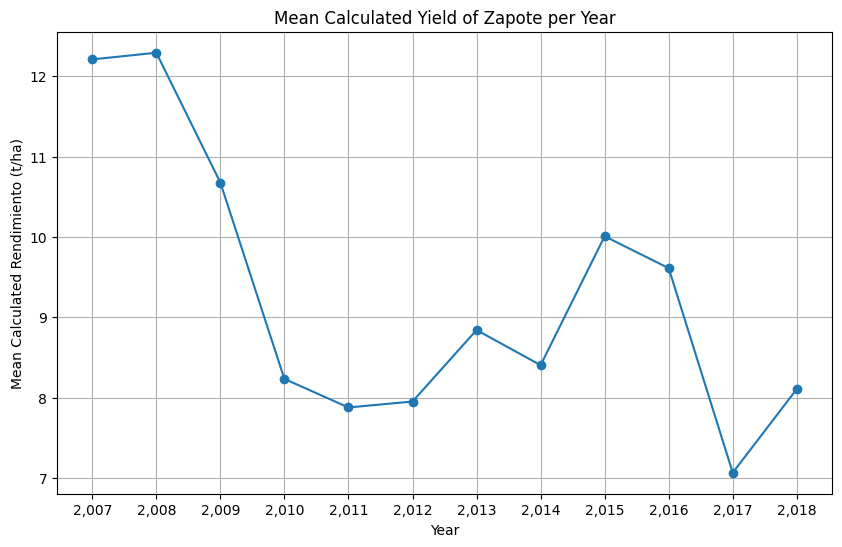

año
2,007    12.210417
2,008    12.293478
2,009    10.676587
2,010     8.231313
2,011     7.876111
2,012     7.950000
2,013     8.840278
2,014     8.402899
2,015    10.007875
2,016     9.610582
2,017     7.063506
2,018     8.105663
Name: calculated_rendimiento_t_ha, dtype: float64

In [ ]:
# prompt: edit the code below, to show 'calculated_rendimiento_t_ha' mean for zapote year after year

# ... (Your existing code)

# Group data by year and crop, then calculate the mean 'calculated_rendimiento_t_ha' for 'ZAPOTE'
zapote_yield_by_year = df[df['cultivo'] == 'ZAPOTE'].groupby('año')['calculated_rendimiento_t_ha'].mean()

# Create the line plot for Zapote yield over the years
plt.figure(figsize=(10, 6))
plt.plot(zapote_yield_by_year.index, zapote_yield_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Calculated Rendimiento (t/ha)')
plt.title('Mean Calculated Yield of Zapote per Year')
plt.grid(True)
plt.show()

# Print the mean values for each year
zapote_yield_by_year